In [ ]:
### This code contains the analysis shown in Figure 4 and Extended Data Figures 11

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb
import ma_codes as codes
from ma_codes import mysize, gray_red, mymap
import pertpy as pt
import seaborn as sns
%matplotlib inline
import math

from matplotlib import colors
gray_red = colors.LinearSegmentedColormap.from_list("", ["lightgray", "red", "darkred"], N = 128)

sc.settings.verbosity = 3               # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_version_and_date()

object_folder = "/media/HDD_1/Janine/Aging_SingleCell/data_objects/"

Running Scanpy 1.10.2, on 2025-06-03 17:44.


In [2]:
plt.rcParams['pdf.fonttype'] = 42

### Load MNP object and subcluster to Monocytes/Macrophages and Lymphoid cells only

In [3]:
adata = sc.read(object_folder + "230111_Bleo_Ageing_annotated_final.h5ad")
#adata = sc.read(object_folder + "221006_BleoAging_MNP_final.h5ad")
sc.set_figure_params(adata, vector_friendly=True, format='pdf', dpi_save=300, facecolor=None, transparent=False, ipython_format='png2x')
plt.rcParams['pdf.fonttype'] = 42

In [4]:
adata =  adata[adata.obs.meta_label.isin(['Macrophages', 'Monocytes', 'T cells', 'B cells', 'Plasma cells', 'NK'])].copy()

In [5]:
adata.obs.cell_type.value_counts()

cell_type
Mature B              12483
Spp1+ Trem2+ ΜΦ        6535
Spp1+ AΜΦ              6346
Naive T                5937
MHCII+ Cx3cr1+ ΜΦ      4892
AΜΦ                    4688
Treg                   4501
MHCII+ S100a6+ ΜΦ      4355
IgM plasma             3636
classical Mono         3470
Memory T               3336
non-classical Mono     3330
Th17                   2762
Memory B               2284
NK                     2247
Cd163+ Lyve1+ ΜΦ       2087
Proliferating T        1886
T_stress               1740
Gzmk+ T                1720
Age-associated B       1335
Resolution ΜΦ          1200
MHCII+ Mono            1036
Proliferating B         944
Proliferating ΜΦ        897
Th2                     859
Cytotoxic T             806
IgA plasma              632
IgG plasma              373
GC-like B               208
Arg1+ Mono              188
Prg4+ ΜΦ                129
Name: count, dtype: int64

computing PCA
    with n_comps=50
    finished (0:00:11)


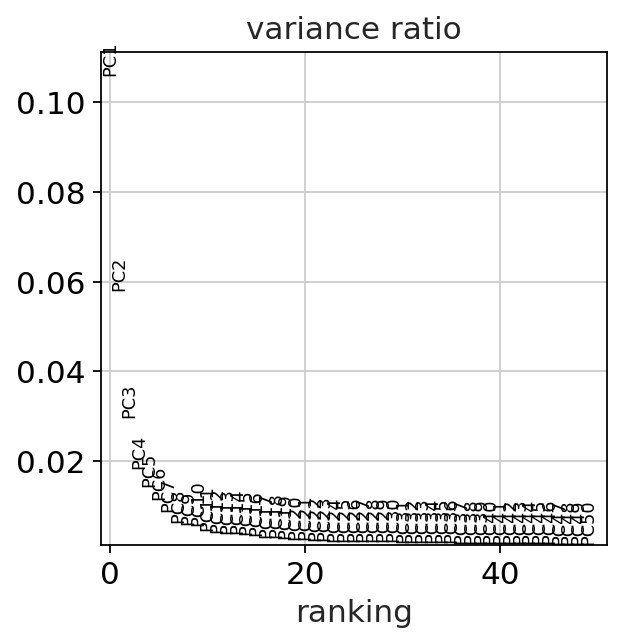

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:38)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:39)


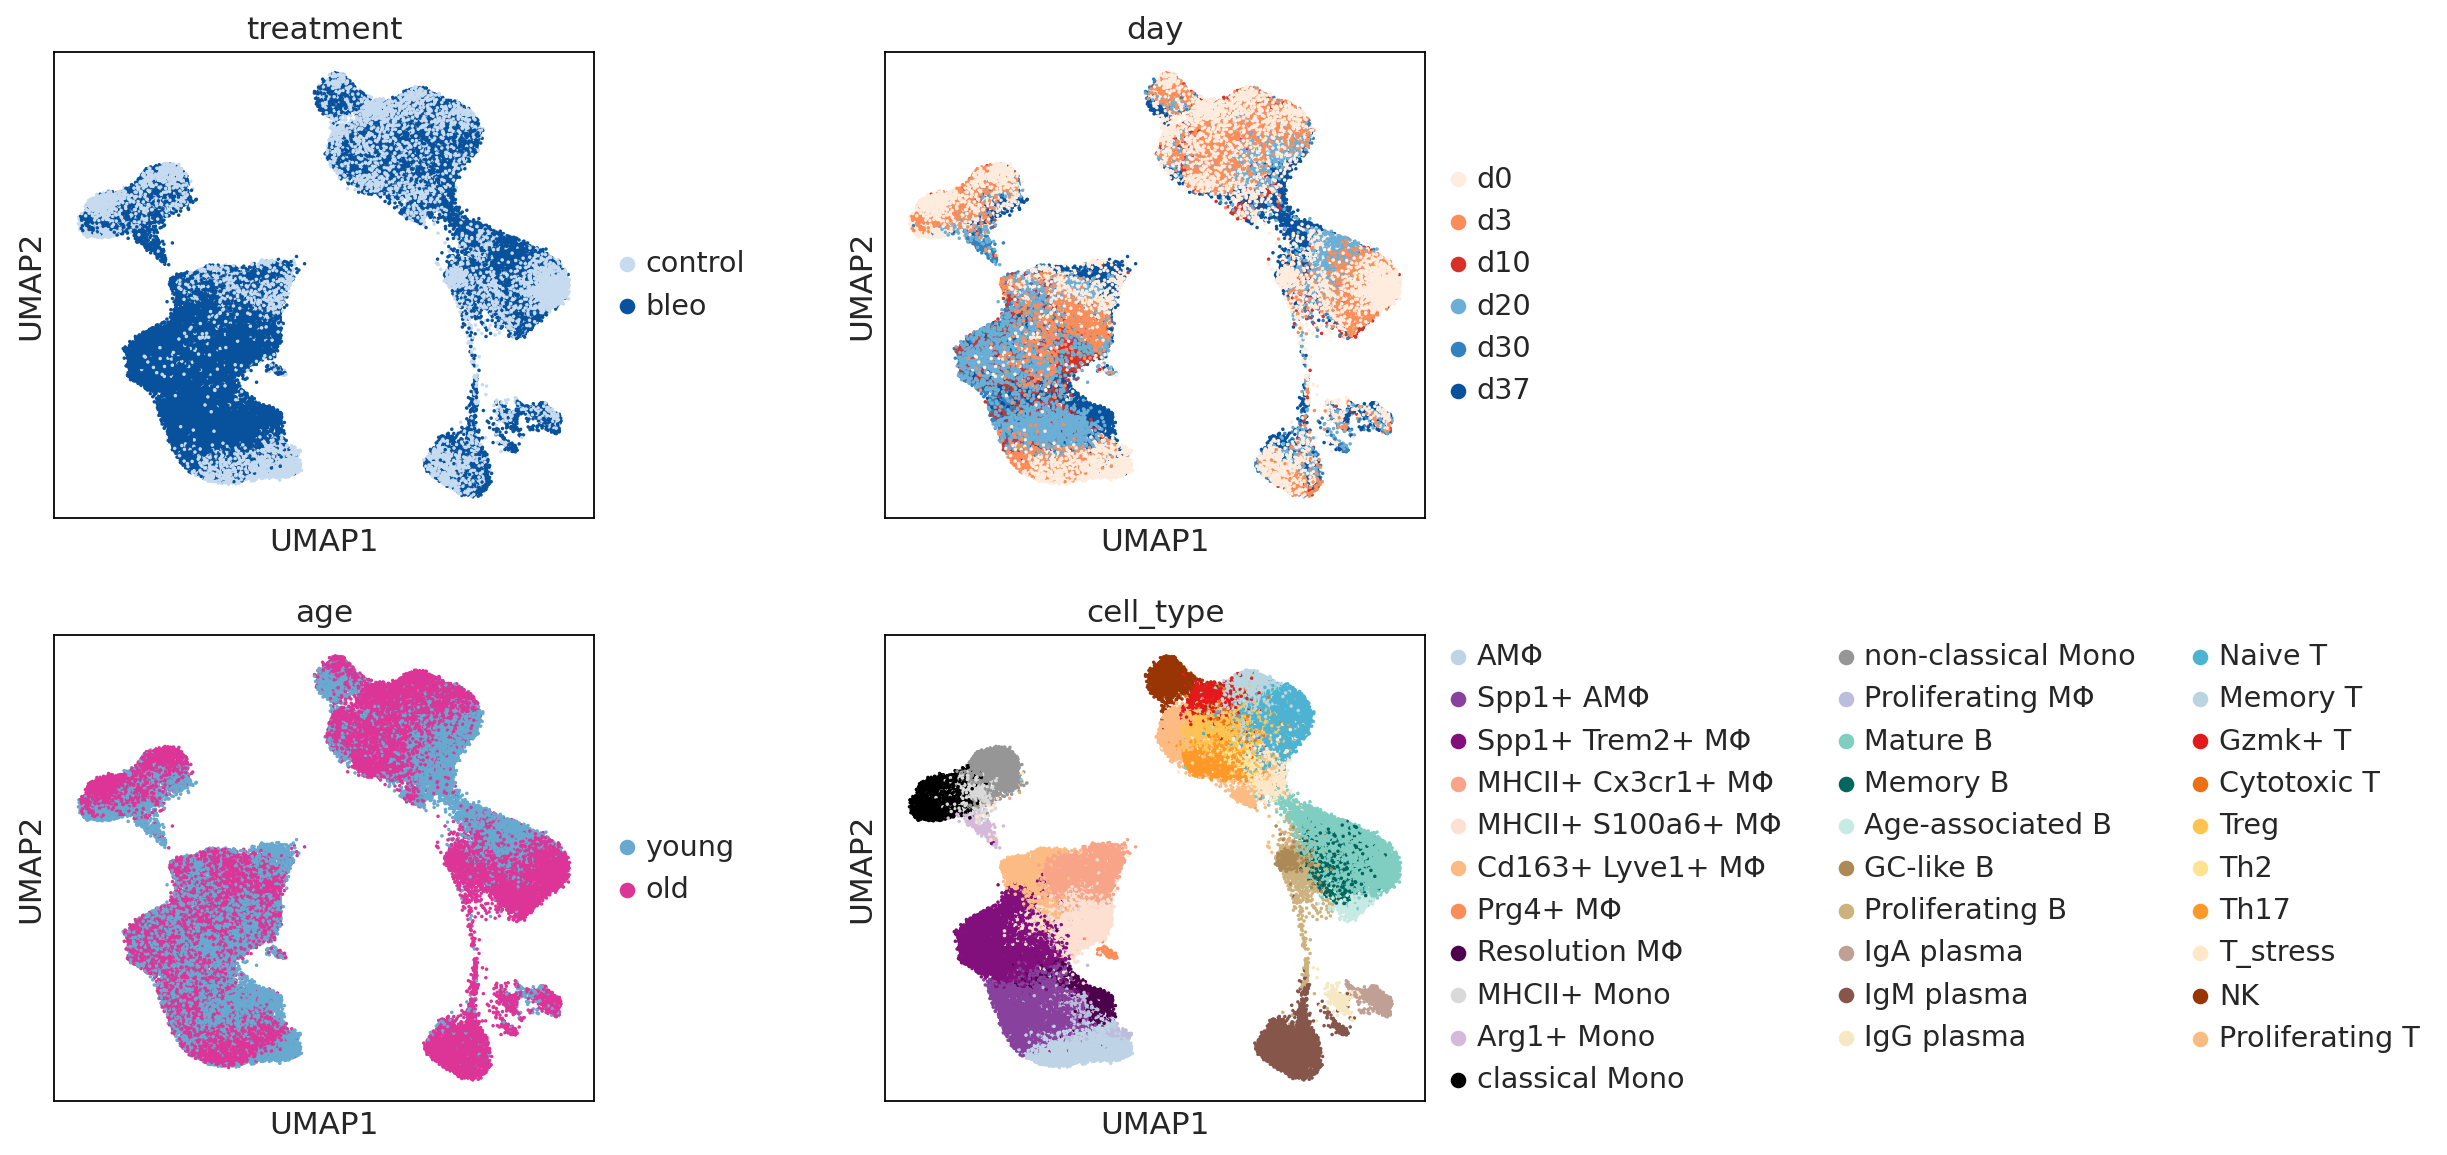

In [6]:
sc.pp.pca(adata, n_comps = 50, use_highly_variable = True)
sc.pl.pca_variance_ratio(adata, n_pcs = 50)
sc.pp.neighbors(adata, n_pcs = 50, n_neighbors = 30)
sc.tl.umap(adata, min_dist=0.5)
sc.pl.umap(adata, color = ["treatment", "day","age", "cell_type"], ncols=2, wspace=0.4, size=10)

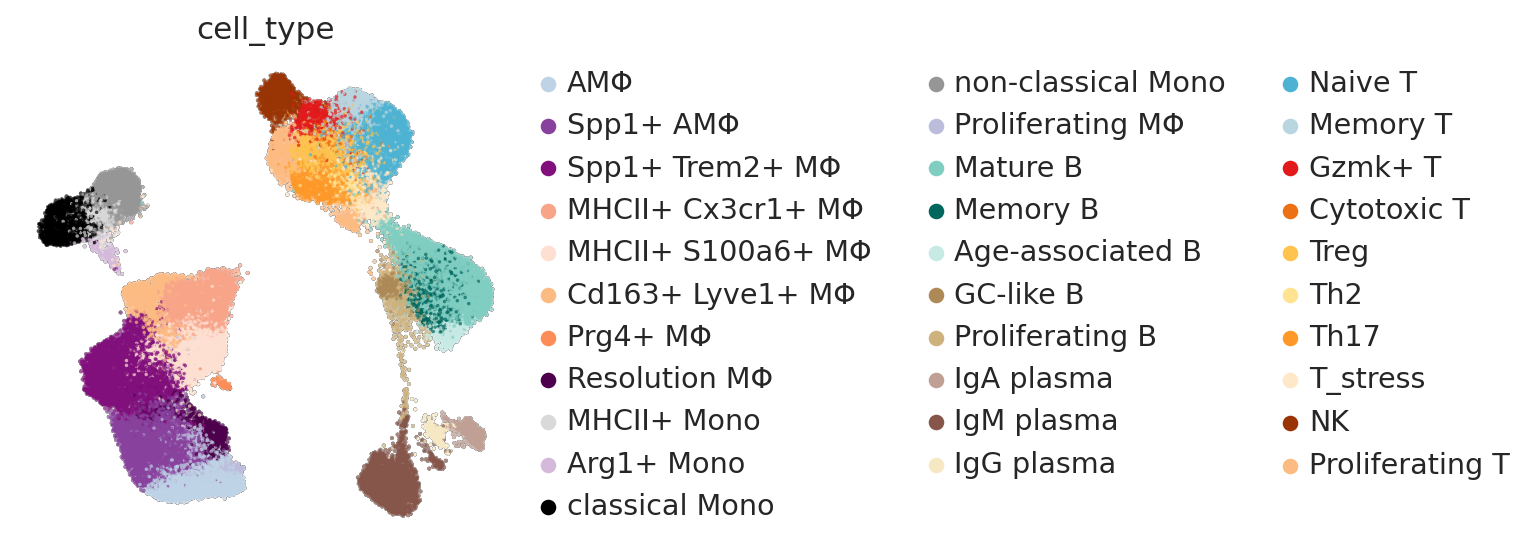

In [7]:
sc.pl.umap(adata, color = ["cell_type"], ncols=2, wspace=0.25, size=10,
          frameon=False,add_outline=True, outline_width=(0.05, 0.01))

### MiloPy

In [8]:
milo = pt.tl.Milo()
mdata = milo.load(adata)

In [9]:
mdata

MuData object with n_obs × n_vars = 86842 × 29814
  2 modalities
    rna:	86842 x 29814
      obs:	'age', 'barcode', 'batch', 'day', 'name', 'sex', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'doublet_scores', 'size_factors', 'S_score', 'G2M_score', 'phase', 'time_point', 'leiden_1', 'leiden_2', 'domain', 'cell_type', 'ct_level2', 'compartment_label', 'meta_label', 'age_treatment', 'age_day'
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'age_colors', 'age_day_colors', 'age_treatment_colors', 'batch_colors', 'cell_type_colors', 'compartment_label_colors', 'ct_level2_colors', 'day_colors', 'dendrogram_cell_type', 'domain_colors', 'hvg', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'meta_label_colors', 'neighbors', 'pca', 'sex_colors', 'time_point_colors', 'treatment_colors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'unsouped_counts'
      obsp:	'connectivities', 'distances'
    milo:	0 x 0

In [10]:
sc.pp.neighbors(mdata["rna"], use_rep="X_umap", n_neighbors=50)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)


In [11]:
milo.make_nhoods(mdata["rna"], prop=0.1)

In [12]:
mdata["rna"].obsm["nhoods"]

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 445648 stored elements and shape (86842, 8213)>

In [13]:
mdata["rna"][mdata["rna"].obs["nhood_ixs_refined"] != 0].obs[["nhood_ixs_refined", "nhood_kth_distance"]]

nhood_ixs_refined  nhood_kth_distance
muc26493_TTGTAGACCCAT                  1            0.142087
muc26493_TCGGCACTCGTC                  1            0.158556
muc26493_GAACTCTGGGGT                  1            0.159551
muc26493_ATTGATGCCGTT                  1            0.140078
muc26493_ACGACTCACACG                  1            0.138394
...                                  ...                 ...
muc26548_TTGACTAAAAGC                  1            0.264330
muc26548_CGATACCATTTG                  1            0.121094
muc26548_GTTGGTTCCCTC                  1            0.184579
muc26548_CAATTCAATAAA                  1            0.174813
muc26548_GAATAGCCGTCC                  1            0.143382

[8213 rows x 2 columns]

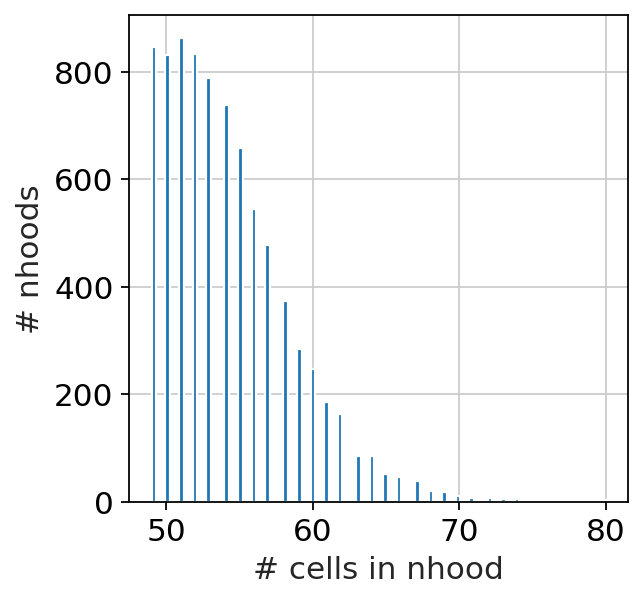

In [14]:
nhood_size = np.array(mdata["rna"].obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins=100)
plt.xlabel("# cells in nhood")
plt.ylabel("# nhoods");

In [15]:
mdata = milo.count_nhoods(mdata, sample_col="name")

In [16]:
mdata["milo"]

AnnData object with n_obs × n_vars = 55 × 8213
    var: 'index_cell', 'kth_distance'
    uns: 'sample_col'

In [17]:
#### Age condition

In [18]:
mdata["rna"].obs["age"] = mdata["rna"].obs["age"].cat.reorder_categories(["young", "old"])
milo.da_nhoods(mdata, design="~age")

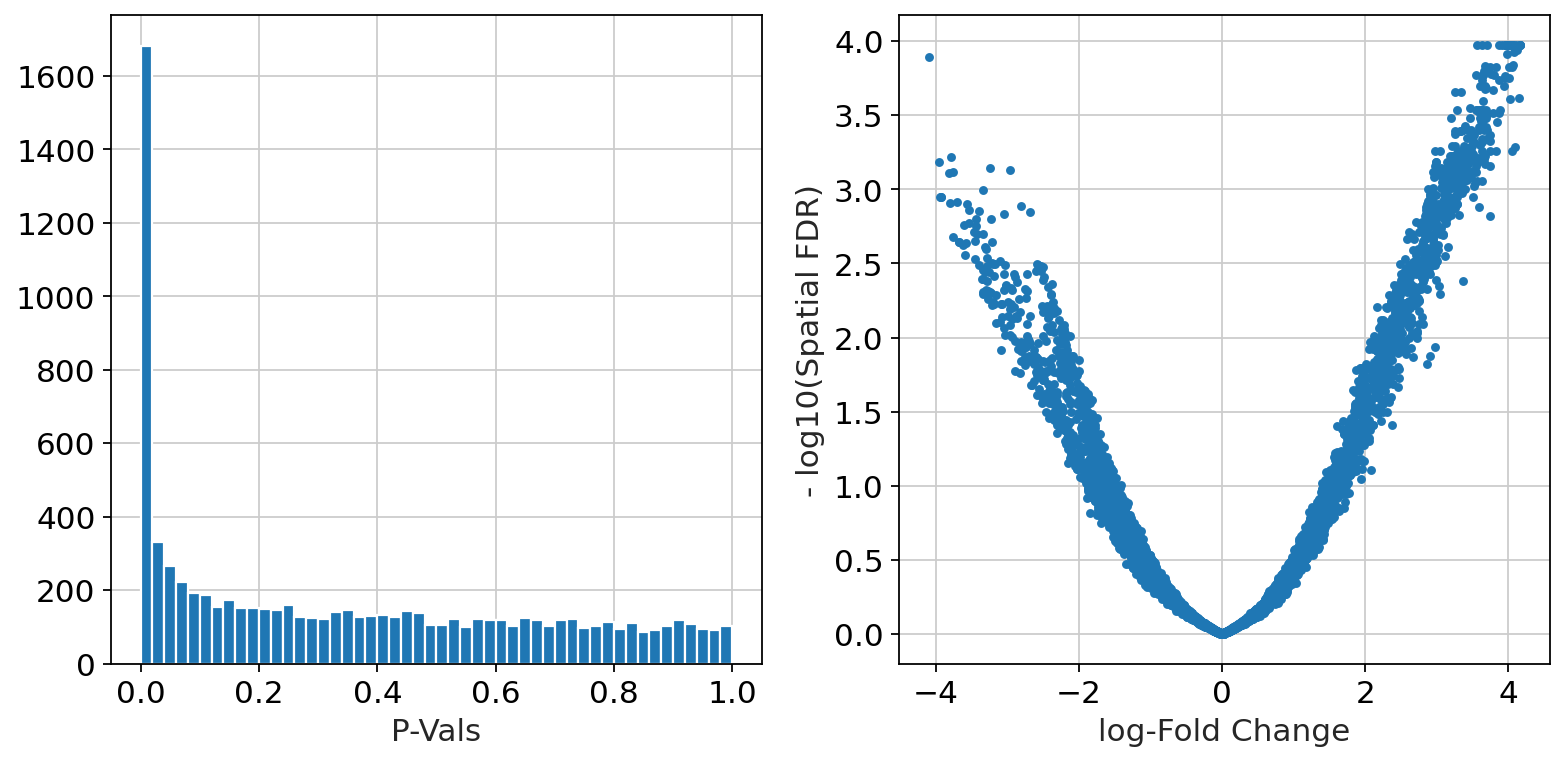

In [19]:
old_figsize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [10, 5]
plt.subplot(1, 2, 1)
plt.hist(mdata["milo"].var.PValue, bins=50)
plt.xlabel("P-Vals")
plt.subplot(1, 2, 2)
plt.plot(mdata["milo"].var.logFC, -np.log10(mdata["milo"].var.SpatialFDR), ".")
plt.xlabel("log-Fold Change")
plt.ylabel("- log10(Spatial FDR)")
plt.tight_layout()
plt.rcParams["figure.figsize"] = old_figsize

In [20]:
milo.build_nhood_graph(mdata)

In [21]:
plt.rcParams["figure.figsize"] = [5, 5]
milo.plot_nhood_graph(
    mdata,
    alpha=0.05,  ## SpatialFDR level (1%)
    min_size=1,  ## Size of smallest dot
    save= ("_Mac_Mono_Lymphocytes_age_day.pdf")
)

In [22]:
milo.annotate_nhoods(mdata, anno_col="cell_type")

Text(0.5, 0, 'celltype fraction')

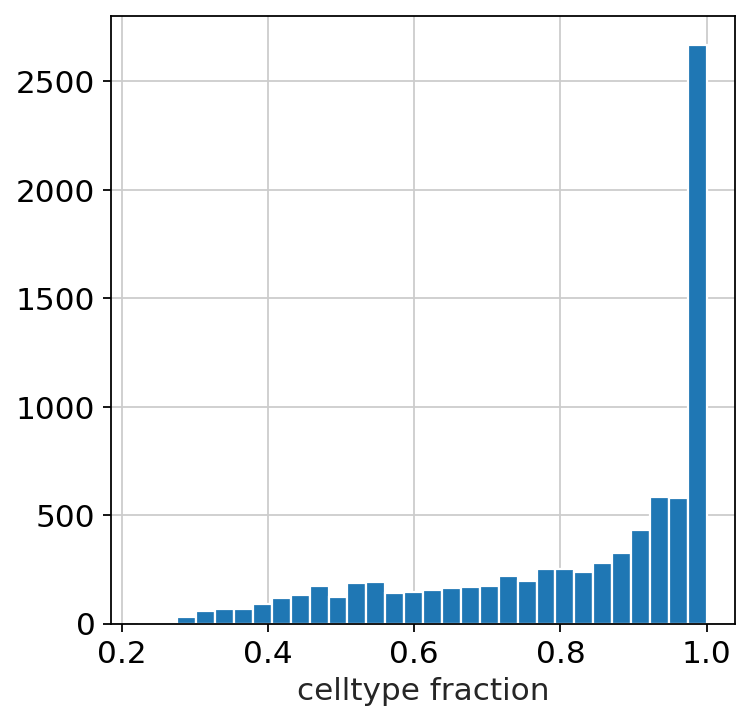

In [23]:
plt.hist(mdata["milo"].var["nhood_annotation_frac"], bins=30)
plt.xlabel("celltype fraction")

In [24]:
mdata["milo"].var.nhood_annotation = mdata["milo"].var.nhood_annotation.cat.add_categories('Mixed')
mdata["milo"].var.loc[mdata["milo"].var["nhood_annotation_frac"] < 0.6, "nhood_annotation"] = "Mixed"
mdata["milo"]

AnnData object with n_obs × n_vars = 55 × 8213
    obs: 'age', 'name'
    var: 'index_cell', 'kth_distance', 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'SpatialFDR', 'Nhood_size', 'nhood_annotation', 'nhood_annotation_frac'
    uns: 'sample_col', 'nhood', 'annotation_labels', 'annotation_obs'
    varm: 'X_milo_graph', 'frac_annotation'
    varp: 'nhood_connectivities'

In [25]:
#mdata["milo"].var.nhood_annotation.cat.add_categories('Mixed')

In [26]:
new_cols= {

    ### MNP ###
    'AΜΦ' : '#bfd3e6',
    'Spp1+ AΜΦ' :'#88419d',
    'Spp1+ Trem2+ ΜΦ' : '#810f7c',
    'MHCII+ Cx3cr1+ ΜΦ' : '#F7A489',
    'MHCII+ S100a6+ ΜΦ' : '#fee0d2',
    'Cd163+ Lyve1+ ΜΦ': '#fdbb84',
    'Prg4+ ΜΦ':'#fc8d59',
    'Resolution ΜΦ': '#4d004b' ,
    'MHCII+ Mono' : '#d9d9d9',
    'Arg1+ Mono' : '#d4b9da',
    'classical Mono': '#000000',
    'non-classical Mono': '#969696',
    'Proliferating ΜΦ': '#bcbddc',

### Lymphocytes ###
    'Mature B': '#80cdc1',
    'Memory B': '#01665e',
    'Age-associated B': '#c7eae5',
    'GC-like B': '#AC8956',
    'Proliferating B': '#CDB27E',
    'IgA plasma' : '#C0A095',
    'IgM plasma': '#86564B',
    'IgG plasma': '#f6e8c3',
    'Naive T': '#4eb3d3',
    'Memory T':'#B8D5E0',
    'Gzmk+ T': '#e31a1c',
    'Cytotoxic T': '#ec7014' ,
    'Treg': '#fec44f',
    'Th2': '#fee391',
    'Th17': '#fe9929',
    'T_stress': '#fee8c8',
    'NK' :'#993404',
    'Proliferating T' :'#fdbb84' ,
    "Mixed": "white"}

In [27]:
order = ['AΜΦ','Spp1+ AΜΦ','Spp1+ Trem2+ ΜΦ','MHCII+ Cx3cr1+ ΜΦ','MHCII+ S100a6+ ΜΦ','Cd163+ Lyve1+ ΜΦ','Prg4+ ΜΦ',
         'Resolution ΜΦ','MHCII+ Mono','Arg1+ Mono','classical Mono','non-classical Mono','Proliferating ΜΦ',
         'Mature B','Memory B','Age-associated B','GC-like B','Proliferating B','IgA plasma',
         'IgM plasma','IgG plasma','Naive T','Memory T','Gzmk+ T','Cytotoxic T','Treg','Th2','Th17',
         'T_stress','NK','Proliferating T', 'Mixed']

In [28]:
mdata["milo"].var.nhood_annotation = mdata["milo"].var.nhood_annotation.cat.reorder_categories(order)

<Axes: xlabel='logFC', ylabel='nhood_annotation'>

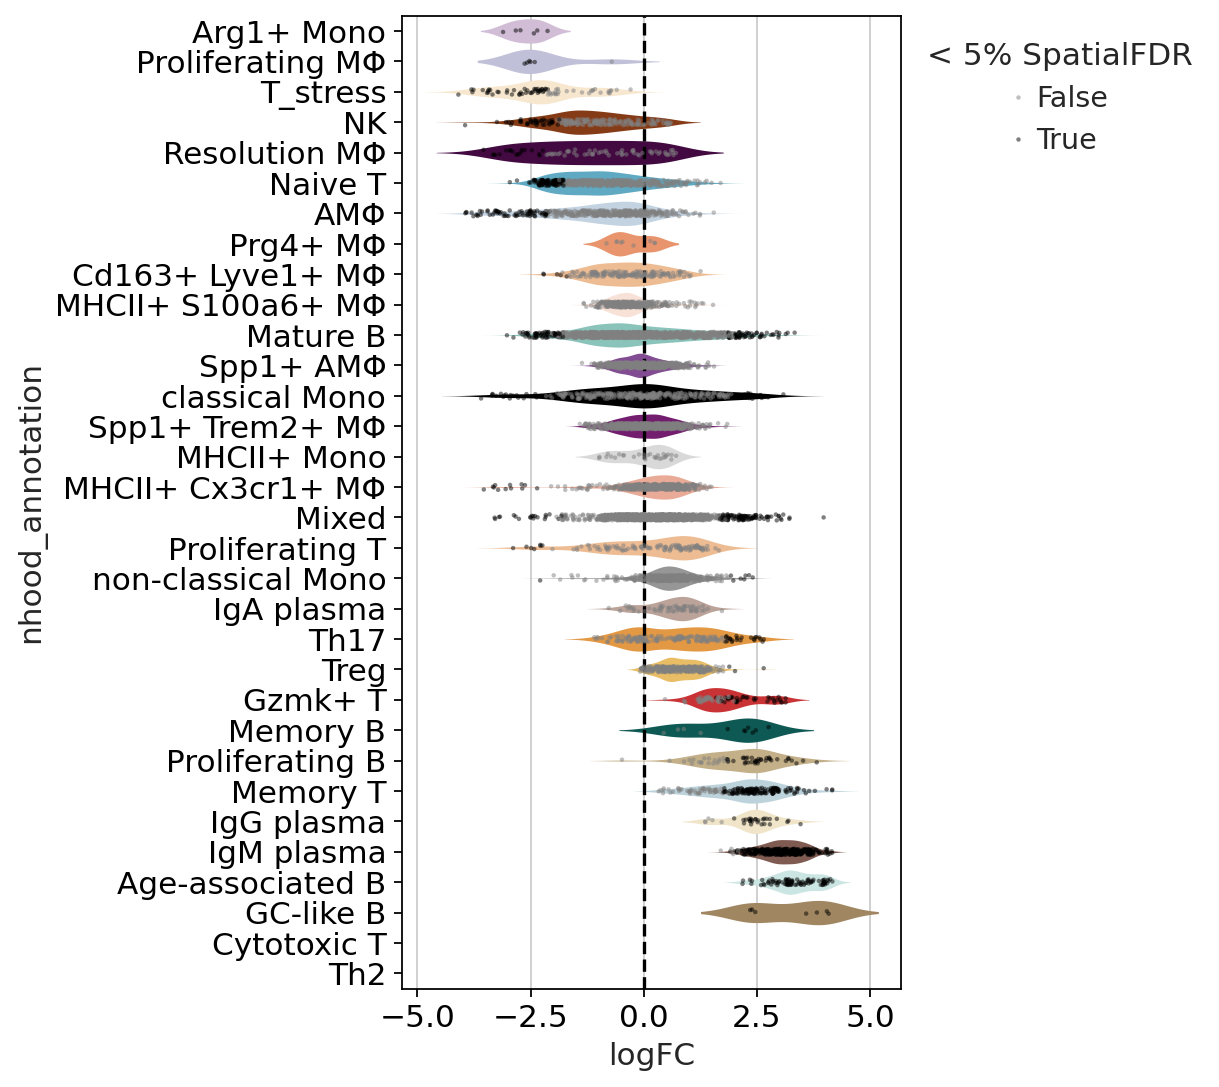

In [29]:
plt.figure(figsize=(4, 8))  # Adjust the width and height as desired
milo.plot_da_beeswarm(mdata, alpha=0.05, palette=new_cols)

In [30]:
nhood_adata = mdata["milo"].T.copy()
anno_col = "nhood_annotation"
alpha = 0.05

anno_df = nhood_adata.obs[[anno_col, "logFC", "SpatialFDR"]].copy()
anno_df["is_signif"] = anno_df["SpatialFDR"] < alpha
anno_df = anno_df[anno_df[anno_col] != "nan"]

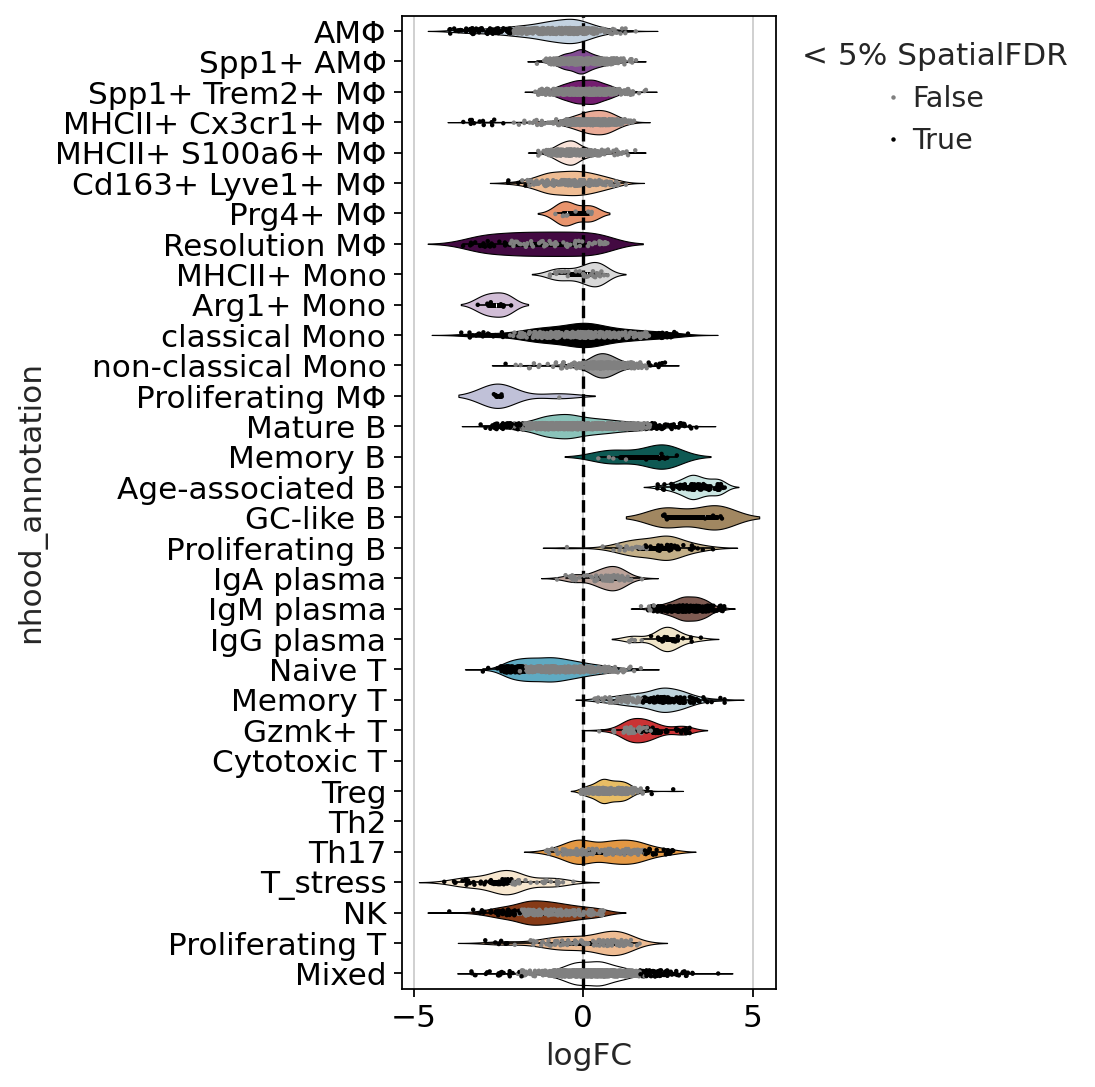

In [31]:
plt.figure(figsize=(3, 8))  # Adjust the width and height as desired
sb.violinplot(data=anno_df, y=anno_col, x="logFC", order=order, orient="h", palette=new_cols, linewidth=0.5,
               scale="width", edgecolor="black")
sb.stripplot(data=anno_df, y=anno_col, x="logFC", order=order, size=2, hue="is_signif", palette=["grey", "black"], orient="h", alpha=1)
plt.legend(loc="upper left", title=f"< {int(alpha * 100)}% SpatialFDR", bbox_to_anchor=(1, 1), frameon=False)
plt.axvline(x=0, ymin=0, ymax=1, color="black", linestyle="--")
plt.savefig("/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/" + "_Milo_bs_Mac_mono_lymphocytes_unsorted.pdf" )

### Export overview plots

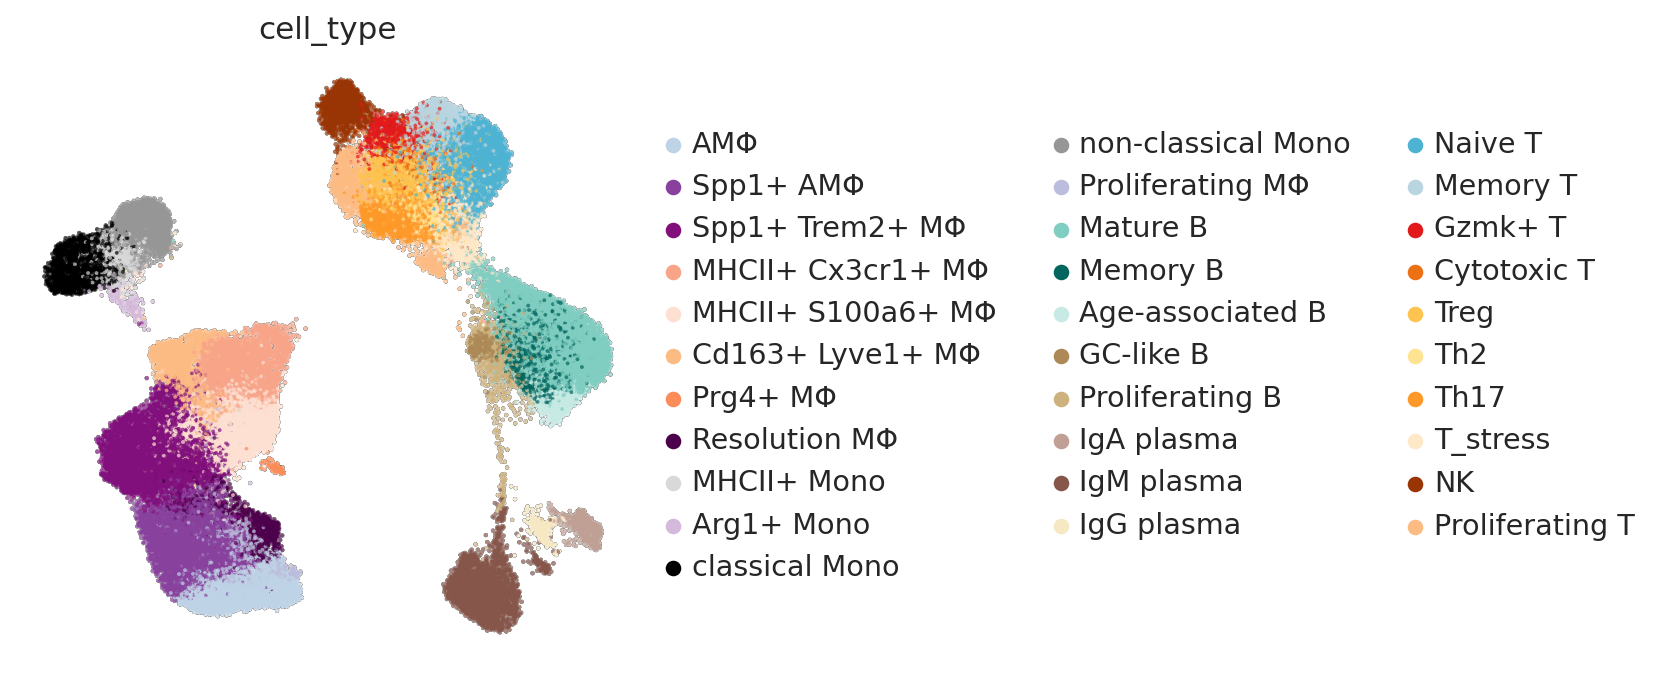

In [32]:
sc.pl.umap(adata, color = ["cell_type"], frameon=False, add_outline=True, 
           outline_width=(0.05, 0.01), size=12, ncols=1, 
           legend_loc= "right margin", 
           save=("_Mac_Mono_Lymphocytes_ct_with_legend.pdf"))

In [33]:
sc.pl.umap(adata, color = ["age_day"], frameon=False, add_outline=True, 
           outline_width=(0.05, 0.01), size=12, ncols=1, 
           legend_loc= "right margin",
           save=("_Mac_Mono_Lymphocytes_age_day.pdf"))

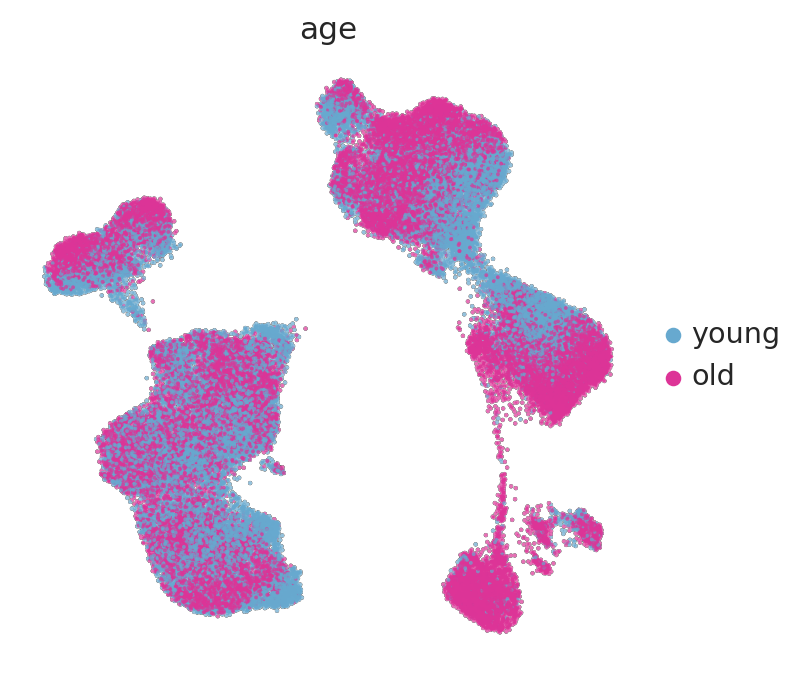

In [34]:
sc.pl.umap(adata, color = ["age"], frameon=False, add_outline=True, 
           outline_width=(0.05, 0.01), size=12, ncols=1, 
           legend_loc= "right margin",
           save=("_Mac_Mono_Lymphocytes_age.pdf"))

In [35]:
sc.pl.umap(adata, color = ["sex"],  frameon=False, add_outline=True, 
           outline_width=(0.05, 0.01), size=12, ncols=1, 
           legend_loc= "right margin",
           save=("_Mac_Mono_Lymphocytes_sex.pdf"))

In [36]:
sc.pl.umap(adata, color = ["treatment"], frameon=False, add_outline=True, 
           outline_width=(0.05, 0.01), size=12, ncols=1, 
           legend_loc= "right margin", 
           save=("__Mac_Mono_Lymphocytes_treatment.pdf"))

### Marker Gene Signatures

In [37]:
T = adata[adata.obs["meta_label"].isin(["T cells", "NK"])].copy()
B = adata[adata.obs["meta_label"].isin(["B cells", "Plasma cells"])].copy()

sc.set_figure_params(T, vector_friendly=True, format='pdf', dpi_save=300, facecolor=None, transparent=False, ipython_format='png2x')
sc.set_figure_params(B, vector_friendly=True, format='pdf', dpi_save=300, facecolor=None, transparent=False, ipython_format='png2x')

plt.rcParams['pdf.fonttype'] = 42

#### Matrixplots with dendogram

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_type']`


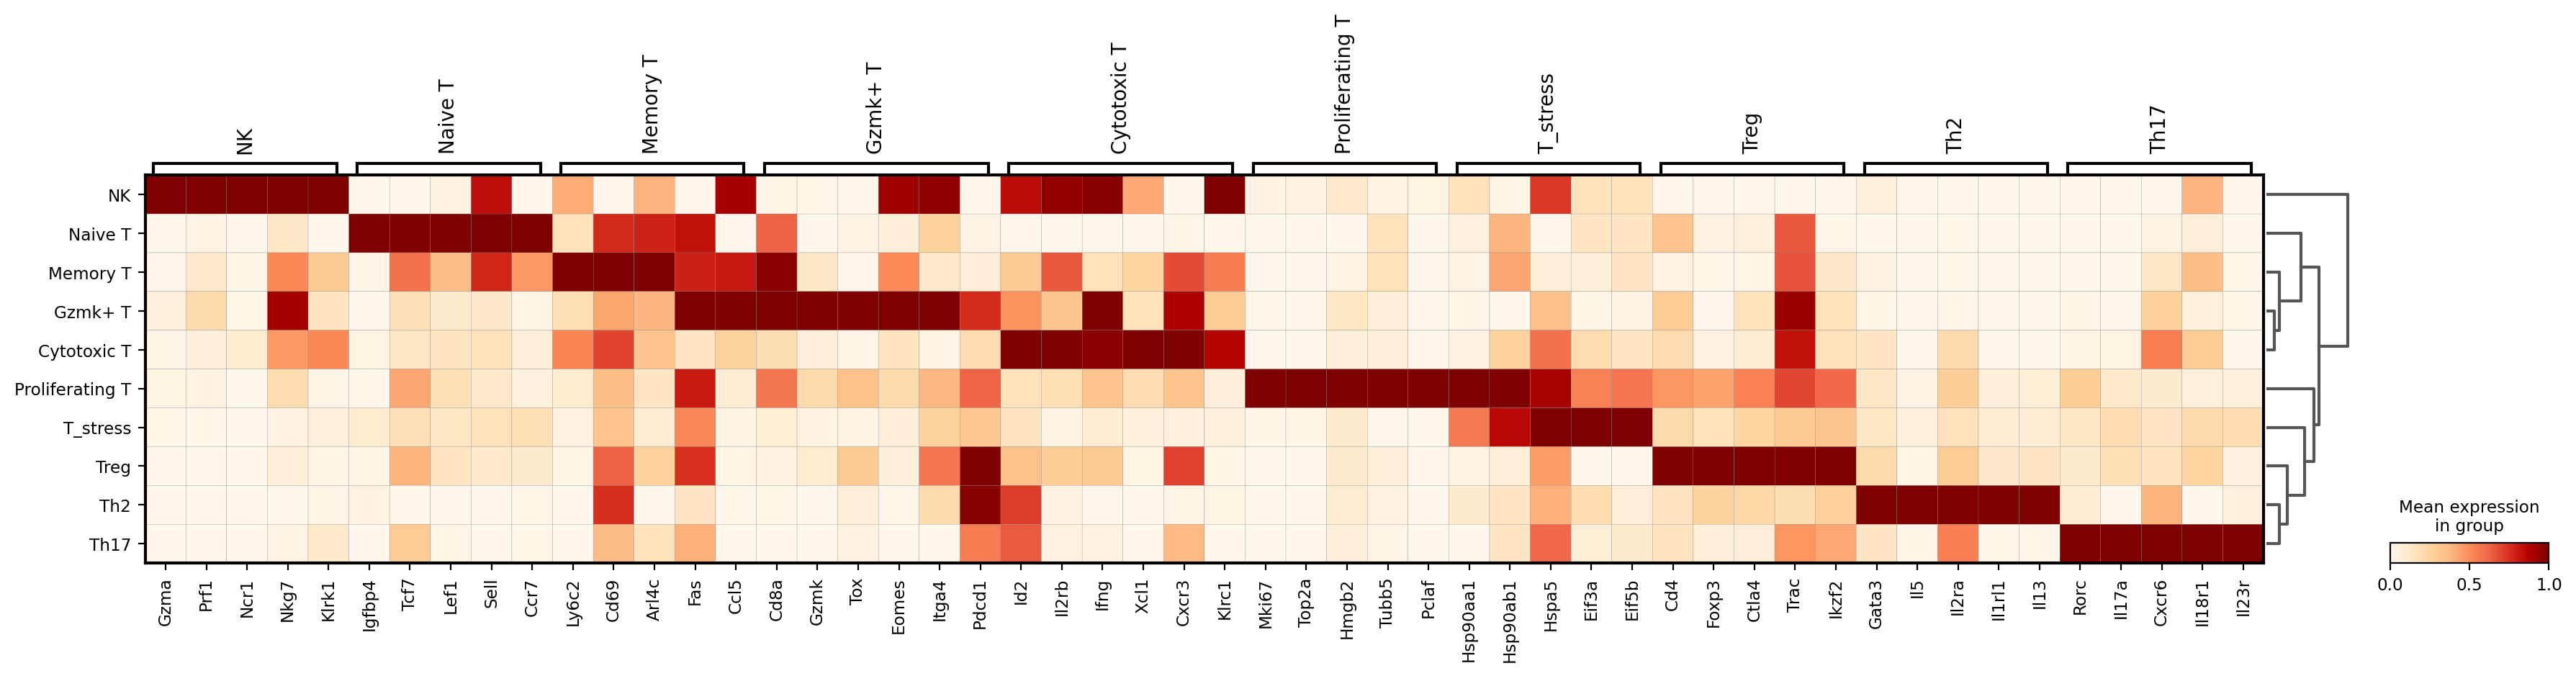

In [38]:
plt.rcdefaults()
plt.rcParams['pdf.fonttype'] = 42


## custom heatmap with dendogram
celltype_markers={'Naive T':  ['Igfbp4','Tcf7', 'Lef1', 'Sell', 'Ccr7'],
                  'Memory T': ['Ly6c2', 'Cd69', 'Arl4c', 'Fas', 'Ccl5'],
                  'Gzmk+ T' : ['Cd8a','Gzmk','Tox','Eomes', 'Itga4', 'Pdcd1'],
                  'Cytotoxic T' : ['Id2','Il2rb', 'Ifng', 'Xcl1', 'Cxcr3', 'Klrc1'],
                  'Treg' : ['Cd4','Foxp3','Ctla4', 'Trac', 'Ikzf2'],
                  'Th2': ['Gata3', 'Il5', 'Il2ra', 'Il1rl1', 'Il13'],
                  'Th17' : ['Rorc','Il17a', 'Cxcr6', 'Il18r1','Il23r'],
                  'T_stress': ['Hsp90aa1', 'Hsp90ab1', 'Hspa5', 'Eif3a', 'Eif5b'],
                  'NK' : ['Gzma', 'Prf1', 'Ncr1','Nkg7', 'Klrk1'],
                  'Proliferating T' : ['Mki67','Top2a', 'Hmgb2', 'Tubb5', 'Pclaf'],                  
                  }
sc.tl.dendrogram(T, 'cell_type')
sc.pl.matrixplot(T, celltype_markers, groupby = 'cell_type', standard_scale='var', dendrogram=True,
                cmap="OrRd", swap_axes=False, save=("_markerplot_horizontal_dendogram_Tells.pdf"))

In [39]:
## custom heatmap with dendogram
celltype_markers={'Plasma cells': ['Mzb1', 'Xbp1', 'Prdm1', 'Igha','Ighm', 'Ighg2b', 'Ighg3', ], 
                  'GC-like B' : ['Aicda', 'Zbtb20', 'Npm1', 'Uchl3', 'Lmo7'],
                  'Proliferating B' : ['Top2a','Mki67','Tubb5','Tuba1b','Pclaf'],
                  'Age-associated B': ['Tbx21', 'Zbtb32', 'Cd72', 'Cd22', 'Pld4'],
                  'Mature B' : ['Cr2', 'Fcer2a', 'Ighd', 'Cd55','Sell', 'Ms4a4c' ],
                  'Memory B' : ['Plac8','Vim', 'Pdcd4', 'Cd27','Ms4a1'],
                  }
sc.tl.dendrogram(B, 'cell_type')
sc.pl.matrixplot(B, celltype_markers, groupby = 'cell_type', standard_scale='var', dendrogram=True,
                cmap="PuBu", swap_axes=False, save=("_markerplot_horizontal_dendogram_Bcells.pdf"))

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_type']`
categories: Mature B, Memory B, Age-associated B, etc.
var_group_labels: Plasma cells, GC-like B, Proliferating B, etc.


### Relative Frequencies

In [40]:
xlabel = "day"                            ## in which column the time info is stored
order = adata.obs[xlabel].cat.categories
print(order)
adata.obs["days_numeric"] = [list(order).index(i) for i in adata.obs[xlabel]]

Index(['d0', 'd3', 'd10', 'd20', 'd30', 'd37'], dtype='object')


In [41]:
xlabel = "age_day"
cell_type_label = "cell_type"
cols = adata.uns["%s_colors" %cell_type_label]
celltypes = adata.obs["cell_type"].cat.categories
order = adata.obs[xlabel].cat.categories.values

relFreqs = codes.calc_relFreq(adata, group_by = cell_type_label, xlabel = xlabel, condition = None)
relFreqs.head(10)

AΜΦ  Spp1+ AΜΦ  Spp1+ Trem2+ ΜΦ  MHCII+ Cx3cr1+ ΜΦ  \
oBf-d10-M12  0.000962   0.023077         0.068750           0.047596   
oBf-d21-M20  0.010304   0.152499         0.126739           0.076249   
oBf-d3-M3    0.035565   0.051604         0.018131           0.045328   
oBf-d42-M35  0.015648   0.022355         0.030551           0.108048   
oBf-d42-M36  0.075400   0.052551         0.061691           0.109673   
oBf_d10_M11  0.000857   0.040274         0.061268           0.035561   
oBf_d21_M19  0.003640   0.148317         0.083712           0.040491   
oBf_d28_M27  0.006824   0.050248         0.078784           0.044045   
oBf_d28_M28  0.005076   0.123858         0.212690           0.126904   
oBf_d3_M5    0.019262   0.015516         0.024612           0.040663   

             MHCII+ S100a6+ ΜΦ  Cd163+ Lyve1+ ΜΦ  Prg4+ ΜΦ  Resolution ΜΦ  \
oBf-d10-M12           0.069231          0.022115  0.000962       0.002885   
oBf-d21-M20           0.052035          0.030397  0.001546       0.006182   
oBf-d3-M3             0.058577          0.020921  0.001395       0.000000   
oBf-d42-M35           0.013413          0.011177  0.000000       0.136364   
oBf-d42-M36           0.009901          0.006093  0.000762       0.079208   
oBf_d10_M11           0.091688          0.008141  0.000428       0.003856   
oBf_d21_M19           0.030482          0.017743  0.001365       0.001820   
oBf_d28_M27           0.006203          0.014888  0.000620       0.001861   
oBf_d28_M28           0.038579          0.011675  0.002538       0.000000   
oBf_d3_M5             0.046014          0.025147  0.000535       0.002675   

             MHCII+ Mono  Arg1+ Mono  ...  Memory T   Gzmk+ T  Cytotoxic T  \
oBf-d10-M12     0.007692    0.000000  ...  0.075962  0.043269     0.012500   
oBf-d21-M20     0.007213    0.002576  ...  0.039155  0.018032     0.006698   
oBf-d3-M3       0.009066    0.000000  ...  0.043236  0.050209     0.011158   
oBf-d42-M35     0.001490    0.000000  ...  0.010432  0.020864     0.002981   
oBf-d42-M36     0.005331    0.000762  ...  0.039604  0.018279     0.002285   
oBf_d10_M11     0.002999    0.000428  ...  0.030420  0.070266     0.008141   
oBf_d21_M19     0.001820    0.000000  ...  0.112830  0.033212     0.005460   
oBf_d28_M27     0.002481    0.001241  ...  0.022953  0.030397     0.004342   
oBf_d28_M28     0.007614    0.000508  ...  0.010660  0.012183     0.002030   
oBf_d3_M5       0.004815    0.000000  ...  0.056715  0.041199     0.014446   

                 Treg       Th2      Th17  T_stress        NK  \
oBf-d10-M12  0.154808  0.009615  0.077404  0.006250  0.015865   
oBf-d21-M20  0.068006  0.020093  0.028851  0.009274  0.002061   
oBf-d3-M3    0.097629  0.013250  0.077406  0.001395  0.050209   
oBf-d42-M35  0.030551  0.010432  0.025335  0.076006  0.002981   
oBf-d42-M36  0.015232  0.010663  0.027418  0.056359  0.005331   
oBf_d10_M11  0.124250  0.010711  0.034276  0.007712  0.010283   
oBf_d21_M19  0.089172  0.010464  0.030027  0.014559  0.005914   
oBf_d28_M27  0.062035  0.006824  0.033499  0.008685  0.013027   
oBf_d28_M28  0.028934  0.000508  0.005076  0.002538  0.001015   
oBf_d3_M5    0.093098  0.009096  0.048689  0.009096  0.030498   

             Proliferating T  age_day  
oBf-d10-M12         0.028846  old_d10  
oBf-d21-M20         0.019578  old_d20  
oBf-d3-M3           0.025105   old_d3  
oBf-d42-M35         0.020119  old_d37  
oBf-d42-M36         0.028941  old_d37  
oBf_d10_M11         0.017138  old_d10  
oBf_d21_M19         0.015924  old_d20  
oBf_d28_M27         0.004342  old_d30  
oBf_d28_M28         0.022335  old_d30  
oBf_d3_M5           0.019262   old_d3  

[10 rows x 32 columns]

Saving Figure to /home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/_RelFreq_Mac_Mono_Lymph.pdf


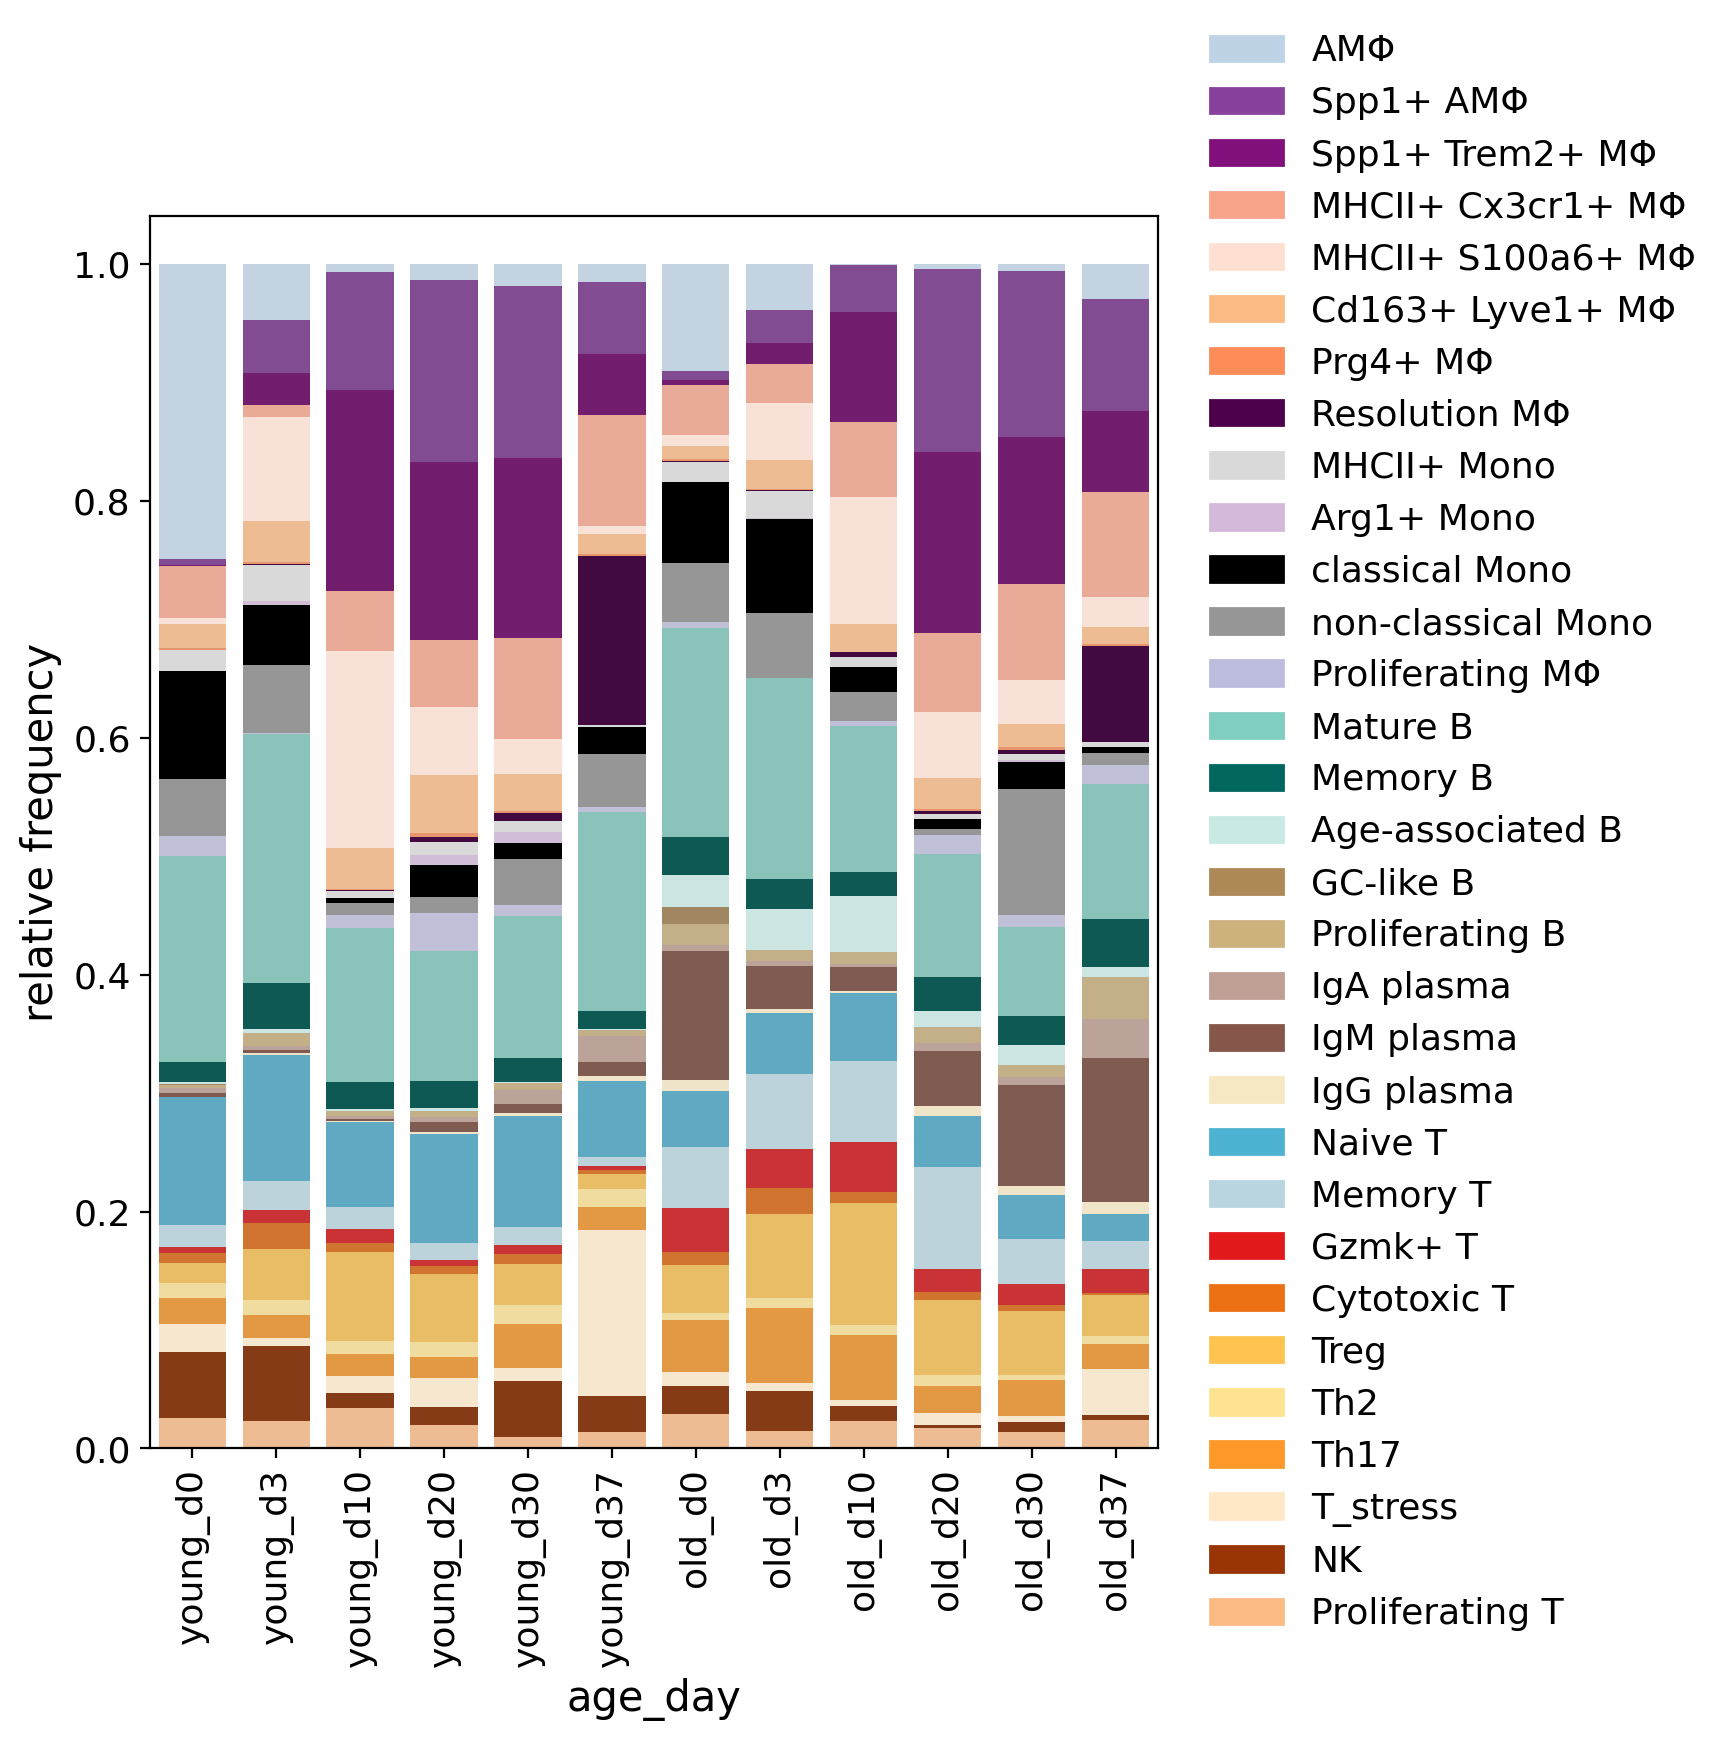

In [42]:
codes.plot_cluster_composition(relFreqs, xlabel = xlabel, figsize = (6.5, 8),
                               order=['young_d0','young_d3','young_d10', 'young_d20', 'young_d30', 'young_d37',
                                      'old_d0','old_d3','old_d10', 'old_d20', 'old_d30', 'old_d37'], cols=cols,
                               errbar = False, width = 0.8, 
                               save="/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/" + "_RelFreq_Mac_Mono_Lymph.pdf") 

In [43]:
M =  adata[adata.obs.meta_label.isin(['Macrophages', 'Monocytes'])].copy()
L =  adata[adata.obs.meta_label.isin(['T cells', 'B cells', 'Plasma cells', 'NK'])].copy()

In [44]:
sc.set_figure_params(M, vector_friendly=True, format='pdf', dpi_save=300, facecolor=None, transparent=False, ipython_format='png2x')
sc.set_figure_params(L, vector_friendly=True, format='pdf', dpi_save=300, facecolor=None, transparent=False, ipython_format='png2x')

plt.rcParams['pdf.fonttype'] = 42

In [45]:
## Relative Frequencies split by condition by specifying Parameter condition
xlabel = "day"
group_by = "cell_type"
condition = "age"
cols = M.uns["%s_colors" %condition]
order = M.obs["day"].cat.categories 

relFreqs = codes.calc_relFreq(M, group_by = group_by, xlabel = xlabel, condition = "age")
relFreqs.head(4)

AΜΦ  Spp1+ AΜΦ  Spp1+ Trem2+ ΜΦ  MHCII+ Cx3cr1+ ΜΦ  \
oBf-d10-M12  0.003205   0.076923         0.229167           0.158654   
oBf-d21-M20  0.020101   0.297487         0.247236           0.148744   
oBf-d3-M3    0.119159   0.172897         0.060748           0.151869   
oBf-d42-M35  0.043659   0.062370         0.085239           0.301455   

             MHCII+ S100a6+ ΜΦ  Cd163+ Lyve1+ ΜΦ  Prg4+ ΜΦ  Resolution ΜΦ  \
oBf-d10-M12           0.230769          0.073718  0.003205       0.009615   
oBf-d21-M20           0.101508          0.059296  0.003015       0.012060   
oBf-d3-M3             0.196262          0.070093  0.004673       0.000000   
oBf-d42-M35           0.037422          0.031185  0.000000       0.380457   

             MHCII+ Mono  Arg1+ Mono  classical Mono  non-classical Mono  \
oBf-d10-M12     0.025641    0.000000        0.073718            0.108974   
oBf-d21-M20     0.014070    0.005025        0.013065            0.009045   
oBf-d3-M3       0.030374    0.000000        0.084112            0.109813   
oBf-d42-M35     0.004158    0.000000        0.014553            0.016632   

             Proliferating ΜΦ  day  age  
oBf-d10-M12          0.006410  d10  old  
oBf-d21-M20          0.069347  d20  old  
oBf-d3-M3            0.000000   d3  old  
oBf-d42-M35          0.022869  d37  old

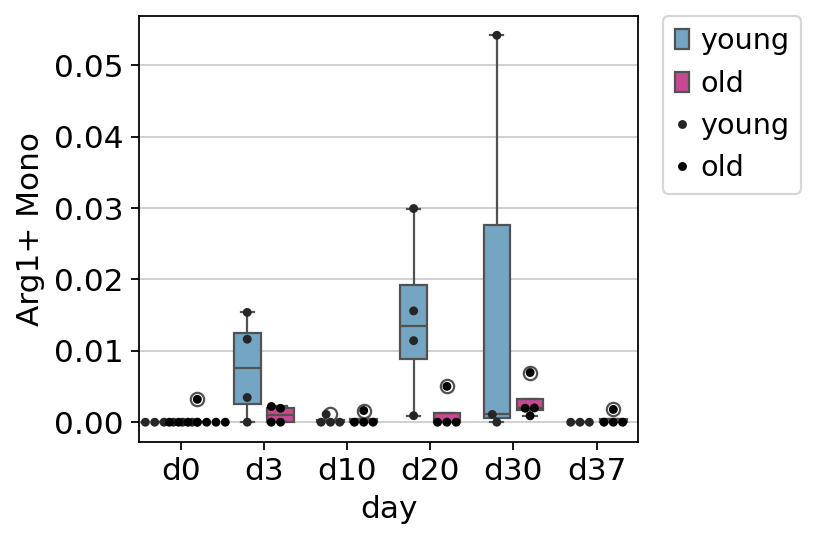

In [46]:
relFreqs = relFreqs.loc[relFreqs[xlabel].isin(order)]
fig, ax = plt.subplots()
fig.set_size_inches(4,3.5)
fig = sb.boxplot(data=relFreqs, hue = condition, hue_order=['young', 'old'], x = xlabel, y = "Arg1+ Mono", order = order, width = 0.8, palette = cols, gap=0.2)
fig = sb.swarmplot(data=relFreqs, color = "black", hue= condition, hue_order=['young', 'old'], dodge=True, x = xlabel, y = "Arg1+ Mono", order = order, size=4) 
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig("/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/" +"_rel_freq_Arg1_Mono.pdf")

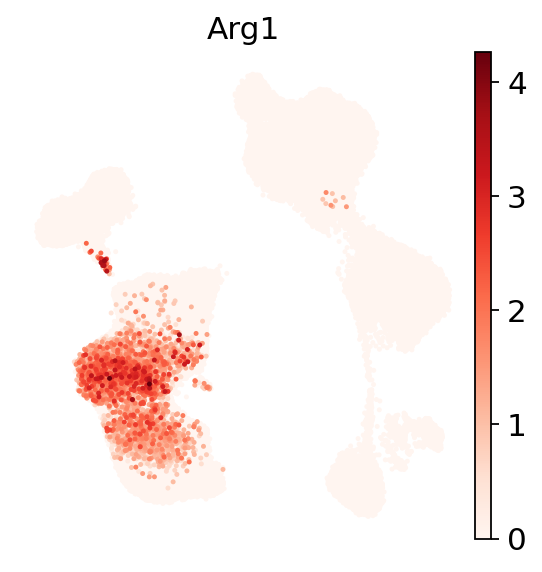

In [50]:
sc.pl.umap(adata, color = ["Arg1"], frameon=False, cmap="Reds", size=20)

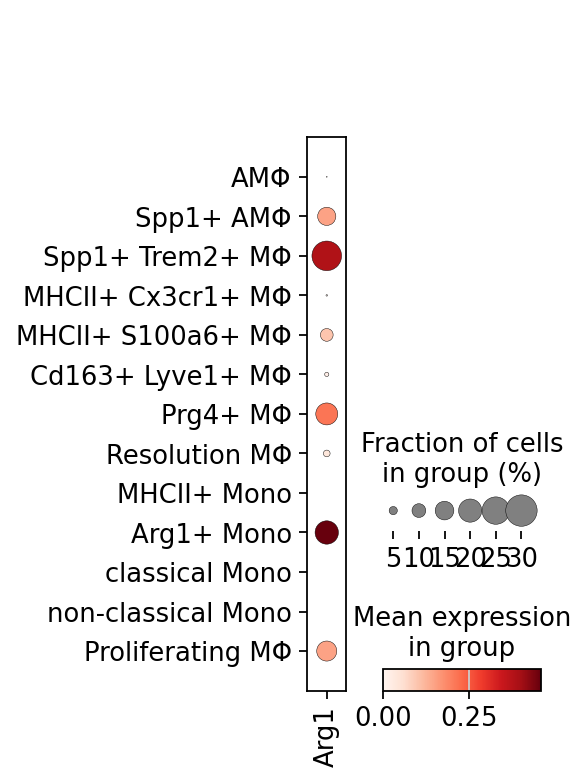

In [51]:
sc.pl.dotplot(M, var_names = ["Arg1"], groupby="cell_type", save="Arg1_expression_MacMono.pdf")

In [52]:
sc.pl.dotplot(M, var_names = ["Arg1"], groupby="age_day", save="Arg1_expression_MacMono_age_day.pdf")

In [77]:
## Relative Frequencies split by condition by specifying Parameter condition
xlabel = "day"
group_by = "cell_type"
condition = "age"
cols = T.uns["%s_colors" %condition]
order = T.obs["day"].cat.categories 

relFreqs = codes.calc_relFreq(T, group_by = group_by, xlabel = xlabel, condition = "age")
relFreqs.head(4)

Naive T  Memory T   Gzmk+ T  Cytotoxic T      Treg       Th2  \
oBf-d10-M12  0.155832  0.151052  0.086042     0.024857  0.307839  0.019120   
oBf-d21-M20  0.149068  0.157350  0.072464     0.026915  0.273292  0.080745   
oBf-d3-M3    0.084629  0.107081  0.124352     0.027634  0.241796  0.032815   
oBf-d42-M35  0.053004  0.049470  0.098940     0.014134  0.144876  0.049470   

                 Th17  T_stress        NK  Proliferating T  day  age  
oBf-d10-M12  0.153920  0.012428  0.031549         0.057361  d10  old  
oBf-d21-M20  0.115942  0.037267  0.008282         0.078675  d20  old  
oBf-d3-M3    0.191710  0.003454  0.124352         0.062176   d3  old  
oBf-d42-M35  0.120141  0.360424  0.014134         0.095406  d37  old

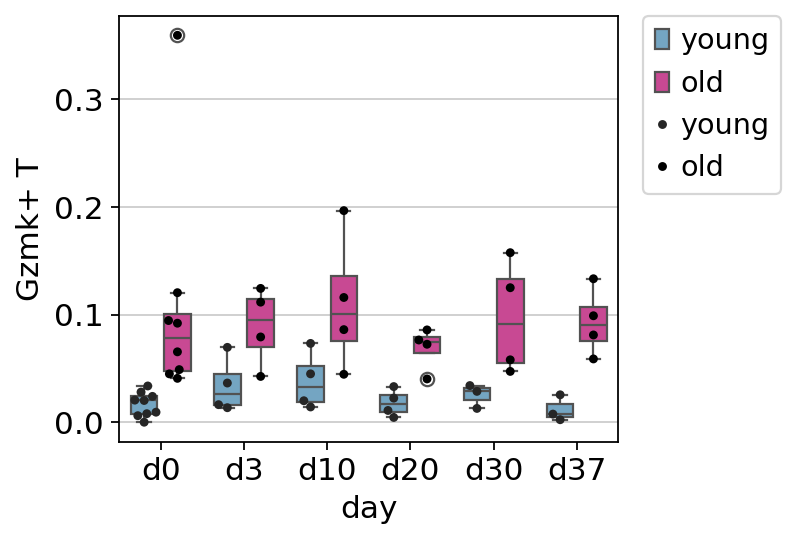

In [78]:
relFreqs = relFreqs.loc[relFreqs[xlabel].isin(order)]
fig, ax = plt.subplots()
fig.set_size_inches(4,3.5)
fig = sb.boxplot(data=relFreqs, hue = condition, hue_order=['young', 'old'], x = xlabel, y = "Gzmk+ T", order = order, width = 0.8, palette = cols, gap=0.2)
fig = sb.swarmplot(data=relFreqs, color = "black", hue= condition, hue_order=['young', 'old'], dodge=True, x = xlabel, y = "Gzmk+ T", order = order, size=4)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig("/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/" +"_rel_freq_GZMK+T.pdf")

In [80]:
## Relative Frequencies split by condition by specifying Parameter condition
xlabel = "day"
group_by = "cell_type"
condition = "age"
cols = B.uns["%s_colors" %condition]
order = B.obs["day"].cat.categories 

relFreqs = codes.calc_relFreq(B, group_by = group_by, xlabel = xlabel, condition = "age")
relFreqs.head(4)

Mature B  Memory B  Age-associated B  GC-like B  Proliferating B  \
oBf-d10-M12  0.485366  0.117073          0.197561        0.0         0.036585   
oBf-d21-M20  0.377970  0.213823          0.053996        0.0         0.088553   
oBf-d3-M3    0.477752  0.114754          0.154567        0.0         0.063232   
oBf-d42-M35  0.247405  0.103806          0.008651        0.0         0.077855   

             IgA plasma  IgM plasma  IgG plasma  day  age  
oBf-d10-M12    0.026829    0.131707    0.004878  d10  old  
oBf-d21-M20    0.028078    0.211663    0.025918  d20  old  
oBf-d3-M3      0.021077    0.152225    0.016393   d3  old  
oBf-d42-M35    0.219723    0.328720    0.013841  d37  old

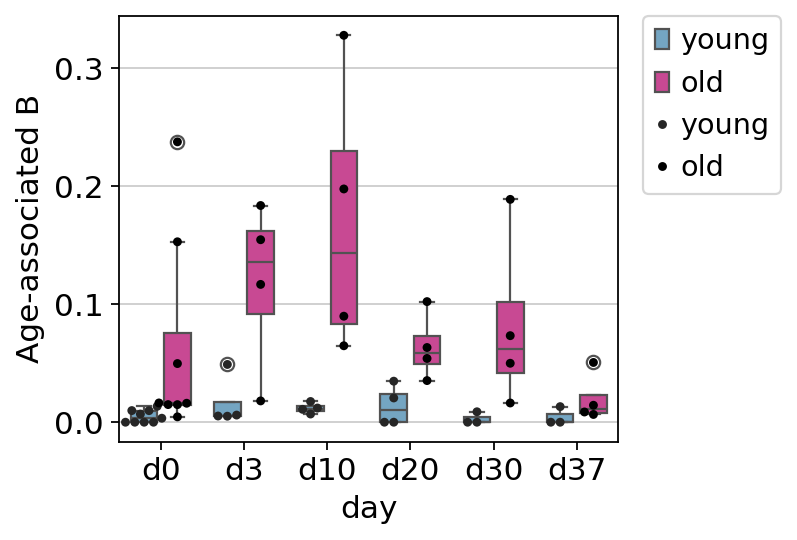

In [81]:
relFreqs = relFreqs.loc[relFreqs[xlabel].isin(order)]
fig, ax = plt.subplots()
fig.set_size_inches(4,3.5)
fig = sb.boxplot(data=relFreqs, hue = condition, hue_order=['young', 'old'], x = xlabel, y = "Age-associated B", order = order, width = 0.8, palette = cols, gap=0.2)
fig = sb.swarmplot(data=relFreqs, color = "black", hue= condition, hue_order=['young', 'old'], dodge=True, x = xlabel, y = "Age-associated B", order = order, size=4) 
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig("/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/" +"_rel_freq_ABC.pdf")

### DGE analysis of Arg1+ Mono

In [61]:
only_mono = adata[adata.obs["meta_label"].isin(["Monocytes"])].copy()
sc.tl.rank_genes_groups(only_mono, groupby = "cell_type",  method="wilcoxon", reference="rest")
#sc.pl.rank_genes_groups(only_T, n_genes=25)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


In [62]:
dge0= sc.get.rank_genes_groups_df(only_mono, group='Arg1+ Mono')
print(dge0.head())
print(dge0.shape)

   names     scores  logfoldchanges         pvals     pvals_adj
0   Srgn  17.004488        2.967405  7.606589e-65  2.267829e-60
1   Ier3  13.329852        3.105584  1.552047e-40  7.712122e-37
2    Vim  13.007018        2.050327  1.116136e-38  4.753781e-35
3   Tgm2  12.873590        4.265707  6.338672e-38  2.362265e-34
4  Tgfbi  12.708014        1.993379  5.337259e-37  1.768056e-33
(29814, 5)


In [63]:
dge0.loc[(dge0.logfoldchanges <= -8), "logfoldchanges"] = -8
dge0.loc[(dge0.logfoldchanges >= 8),"logfoldchanges"] = 8
dge0.loc[(dge0.pvals <= 1e-100), "pvals"] = 1e-100

#### Volcano plot

In [64]:
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore")
from rpy2.robjects import pandas2ri
pandas2ri.activate()
%load_ext rpy2.ipython

In [65]:
%%R 
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(dplyr))

In addition: Warning messages:
1: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
2: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
3: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
4: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
5: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [66]:
%R  -i dge0

In [67]:
%%R
dge0$expression <- "none"
dge0$expression[dge0$logfoldchanges > 1 & dge0$pvals_adj < 0.05] <- "up"
dge0$expression[dge0$logfoldchanges < -1 & dge0$pvals_adj < 0.05] <- "down"

In [68]:
%%R
dge0$delabel <- NA
dge0$delabel <- ifelse(dge0$names %in% head(dge0[order(dge0$pvals_adj), "names"], 50), dge0$names, NA)

In [69]:
%%R
dge0.label1 <- dge0[abs(dge0$logfoldchanges) >= 0.25 & dge0$pvals_adj < 0.05, ]
dge0.label1$delabel <- ifelse(dge0.label1$names %in% head(dge0.label1[order(dge0.label1$pvals_adj), "names"], 20), dge0.label1$names, NA)
dge0.label2 <- dge0[!c(abs(dge0$logfoldchanges) >= 0.25 & dge0$pvals_adj < 0.05), ]
dge0.label2$delabel <- NA
dge0.label <- rbind(dge0.label1, dge0.label2)

In [70]:
%%R
p1 <- ggplot(data=dge0, aes(x=logfoldchanges, y=-log10(pvals), col=expression, label = delabel)) + 
     geom_point() + geom_vline(xintercept = c(-1, 1), col = "#000000", linetype = "dashed") + 
     geom_hline(yintercept = -log10(0.05), col = "#000000", linetype = "dashed") +  
     scale_fill_manual(values = c("#2B3990", "gray", "#BE1E2D")) + 
     scale_color_manual(values = c("#2B3990", "gray", "#BE1E2D")) + 
     labs(x = expression("log"[2]*"FC"), y = expression("-log"[10]*"p-value")) + 
     geom_text_repel(max.overlaps = Inf) + 
     theme(text = element_text(size = 20, color = "#000000"), 
           legend.title = element_blank(),
           axis.line = element_line(colour = "#000000", size = 1), 
           legend.position = "none",
           panel.background = element_blank(),
           aspect.ratio = 1/1)
p1

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 29764 rows containing missing values or values outside the scale range
(`geom_text_repel()`). 



In addition: Warning message:
The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


In [71]:
%%R
sig_il_genes <- dge0 %>%
    filter(names %in% c("Hif1a","Arg1","Srgn","Tgm2","Thbs1", "Tgfbi", "Vim", "Ier3", "Cybb", "Cd44", "Fcgr3", "Cd14",
                        "Plac8", "Ly6e", "Itgal", "Spn", "Fyb", "Cx3cr", "Itga4", "Pou2f2", "Fcgr2b", "Pkm", "Fcgr3", "Ccr1"))

In [72]:
%%R
p <- ggplot(data=dge0, aes(x=logfoldchanges, y=-log10(pvals))) + 
    geom_point()  + 
    geom_point(aes(colour = expression)) +  
    geom_vline(xintercept = c(-1., 1), col = "#000000", linetype = "dashed") + 
    geom_hline(yintercept = -log10(0.05), col = "#000000", linetype = "dashed") + 
    #scale_fill_manual(values = c("black", "gray", "#EF6548"))  + 
    scale_color_manual(values = c("black", "gray", "#d4b9da")) + 
    geom_label_repel(data = sig_il_genes, aes(label = names),  max.overlaps = Inf, force = 2, force_pull=2, nudge_y = 2,) +
    labs(x = expression("log"[2]*"FC"), y = expression("-log"[10]*"p-value"))  +  theme(text = element_text(size = 18, color = "#000000"), 
         legend.title = element_blank(),
         axis.line = element_line(colour = "#000000", size = 0.5), 
         legend.position = "none",
         panel.background = element_blank(),
         aspect.ratio = 1/1)
p


In [73]:
%%R
ggsave(file = paste0("Volcano", "_arg1_mono.pdf"), p, width = 5, height = 5)

### DGE analysis of Gzmk+ T cells

In [74]:
## Subset to T cells only to get the marker signature of the Gzmk+ T compared to all other T cells
only_T = adata[adata.obs["meta_label"].isin(["T cells"])].copy()
sc.tl.rank_genes_groups(only_T, groupby = "cell_type",  method="wilcoxon", reference="rest")
#sc.pl.rank_genes_groups(only_T, n_genes=25)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:15)


In [75]:
dge1= sc.get.rank_genes_groups_df(only_T, group='Gzmk+ T')
print(dge1.head())
print(dge1.shape)

    names     scores  logfoldchanges          pvals      pvals_adj
0    Ccl5  59.106197        4.455725   0.000000e+00   0.000000e+00
1    Nkg7  42.448936        2.987511   0.000000e+00   0.000000e+00
2  Ms4a4b  28.967094        1.498623  1.709585e-184  1.274239e-180
3   H2-Q7  23.191156        1.098898  5.592104e-119  3.334460e-115
4    Gzmk  22.693710        4.106878  5.168825e-114  2.568389e-110
(29814, 5)


In [76]:
dge1.loc[(dge1.logfoldchanges <= -8), "logfoldchanges"] = -8
dge1.loc[(dge1.logfoldchanges >= 8),"logfoldchanges"] = 8
dge1.loc[(dge1.pvals <= 1e-100), "pvals"] = 1e-100

In [77]:
dge1

names     scores  logfoldchanges          pvals      pvals_adj
0        Ccl5  59.106197        4.455725  1.000000e-100   0.000000e+00
1        Nkg7  42.448936        2.987511  1.000000e-100   0.000000e+00
2      Ms4a4b  28.967094        1.498623  1.000000e-100  1.274239e-180
3       H2-Q7  23.191156        1.098898  1.000000e-100  3.334460e-115
4        Gzmk  22.693710        4.106878  1.000000e-100  2.568389e-110
...       ...        ...             ...            ...            ...
29809    Rps8 -19.371725       -0.835302   1.337043e-83   2.847329e-80
29810   Rps19 -19.905787       -1.203008   3.625600e-88   8.314895e-85
29811   Rps24 -20.279613       -0.858702   1.946563e-91   5.275893e-88
29812   Rplp1 -20.307209       -0.856989   1.110389e-91   3.310513e-88
29813    Il7r -28.987169       -2.335895  1.000000e-100  9.489550e-181

[29814 rows x 5 columns]

In [78]:
#dge1.to_csv("dge1.csv")

#### Volcano plot

In [79]:
%R  -i dge1

In [80]:
%%R
dge1$expression <- "none"
dge1$expression[dge1$logfoldchanges > 1 & dge1$pvals_adj < 0.05] <- "up"
dge1$expression[dge1$logfoldchanges < -1 & dge1$pvals_adj < 0.05] <- "down"

In [81]:
%%R
dge1$delabel <- NA
dge1$delabel <- ifelse(dge1$names %in% head(dge1[order(dge1$pvals_adj), "names"], 50), dge1$names, NA)

In [82]:
%%R
dge1.label1 <- dge1[abs(dge1$logfoldchanges) >= 1 & dge1$pvals_adj < 0.05, ]
dge1.label1$delabel <- ifelse(dge1.label1$names %in% head(dge1.label1[order(dge1.label1$pvals_adj), "names"], 20), dge1.label1$names, NA)
dge1.label2 <- dge1[!c(abs(dge1$logfoldchanges) >= 1 & dge1$pvals_adj < 0.05), ]
dge1.label2$delabel <- NA
dge1.label <- rbind(dge1.label1, dge1.label2)

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 29764 rows containing missing values or values outside the scale range
(`geom_text_repel()`). 



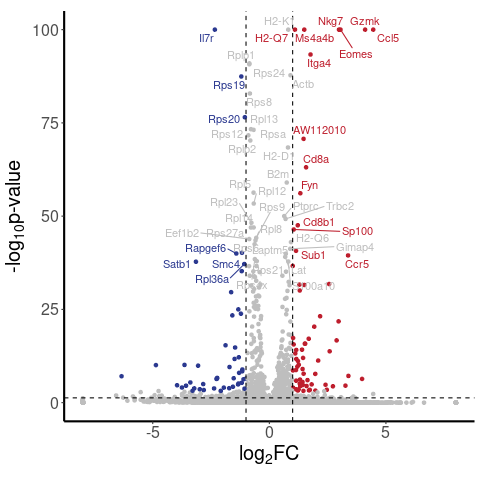

In [83]:
%%R
p1 <- ggplot(data=dge1, aes(x=logfoldchanges, y=-log10(pvals), col=expression, label = delabel)) + 
     geom_point() + geom_vline(xintercept = c(-1, 1), col = "#000000", linetype = "dashed") + 
     geom_hline(yintercept = -log10(0.05), col = "#000000", linetype = "dashed") +  
     scale_fill_manual(values = c("#2B3990", "gray", "#BE1E2D")) + 
     scale_color_manual(values = c("#2B3990", "gray", "#BE1E2D")) + 
     labs(x = expression("log"[2]*"FC"), y = expression("-log"[10]*"p-value")) + 
     geom_text_repel(max.overlaps = Inf) + 
     theme(text = element_text(size = 20, color = "#000000"), 
           legend.title = element_blank(),
           axis.line = element_line(colour = "#000000", size = 1), 
           legend.position = "none",
           panel.background = element_blank(),
           aspect.ratio = 1/1)
p1

In [84]:
%%R
sig_il_genes <- dge1 %>%
    filter(names %in% c("Gzmk", "Gzma", "Gzmb", "Nkg7", "Prf1", "Ifng", "Il7r", "Sell", 
                        "Ccr7","Il18r1", "Itga4", "Ccr5", "Itgal", "Tox", "Tigit", "Eomes",
                        "Ccl5", "Dapl1", "Cd8a", "Cd8b1", "Ccl5","Itgb2", "Tcf7", "Il1rl1", "Satb1"))

In [85]:
%%R
p <- ggplot(data=dge1, aes(x=logfoldchanges, y=-log10(pvals))) + 
    geom_point()  + 
    geom_point(aes(colour = expression)) +  
    geom_vline(xintercept = c(-1., 1), col = "#000000", linetype = "dashed") + 
    geom_hline(yintercept = -log10(0.05), col = "#000000", linetype = "dashed") + 
    scale_color_manual(values = c("black", "gray", "#E21F26")) + 
    geom_label_repel(data = sig_il_genes, aes(label = names),  max.overlaps = Inf, force = 2, force_pull=2, nudge_y = 2,) +
    labs(x = expression("log"[2]*"FC"), y = expression("-log"[10]*"p-value"))  +  theme(text = element_text(size = 18, color = "#000000"), 
         legend.title = element_blank(),
         axis.line = element_line(colour = "#000000", size = 0.5), 
         legend.position = "none",
         panel.background = element_blank(),
         aspect.ratio = 1/1)
p


In [86]:
%%R
ggsave(file = paste0("Volcano", "_Gzmk+T.pdf"), p, width = 5, height = 5)

### DGE analysis of Age-associated B cells

In [87]:
only_B = adata[adata.obs["meta_label"].isin(["B cells"])].copy()
sc.tl.rank_genes_groups(only_B, groupby = "cell_type",  method="wilcoxon", reference="rest")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:11)


In [88]:
dge2= sc.get.rank_genes_groups_df(only_B, group='Age-associated B')
print(dge2.head())
print(dge2.shape)

    names     scores  logfoldchanges          pvals      pvals_adj
0    Ighm  42.089409        2.738948   0.000000e+00   0.000000e+00
1  H2-Ab1  40.521938        1.718828   0.000000e+00   0.000000e+00
2  H2-Eb1  35.955624        1.558679  4.133949e-283  4.108318e-279
3    Cd72  30.469707        2.232873  6.568266e-204  4.895657e-200
4   H2-K1  30.451159        1.480352  1.156358e-203  6.895131e-200
(29814, 5)


In [89]:
dge2.loc[(dge2.logfoldchanges <= -8), "logfoldchanges"] = -8
dge2.loc[(dge2.logfoldchanges >= 8),"logfoldchanges"] = 8
dge2.loc[(dge2.pvals <= 1e-100), "pvals"] = 1e-100

#### Volcano plot

In [90]:
%R  -i dge2

In [91]:
%%R
dge2$expression <- "none"
dge2$expression[dge2$logfoldchanges > 1 & dge2$pvals_adj < 0.05] <- "up"
dge2$expression[dge2$logfoldchanges < -1 & dge2$pvals_adj < 0.05] <- "down"

In [92]:
%%R
dge2$delabel <- NA
dge2$delabel <- ifelse(dge2$names %in% head(dge2[order(dge2$pvals_adj), "names"], 50), dge2$names, NA)

In [93]:
%%R
dge2.label1 <- dge2[abs(dge2$logfoldchanges) >= 0.25 & dge2$pvals_adj < 0.05, ]
dge2.label1$delabel <- ifelse(dge2.label1$names %in% head(dge2.label1[order(dge2.label1$pvals_adj), "names"], 20), dge2.label1$names, NA)
dge2.label2 <- dge2[!c(abs(dge2$logfoldchanges) >= 0.25 & dge2$pvals_adj < 0.05), ]
dge2.label2$delabel <- NA
dge2.label <- rbind(dge2.label1, dge2.label2)

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 29764 rows containing missing values or values outside the scale range
(`geom_text_repel()`). 



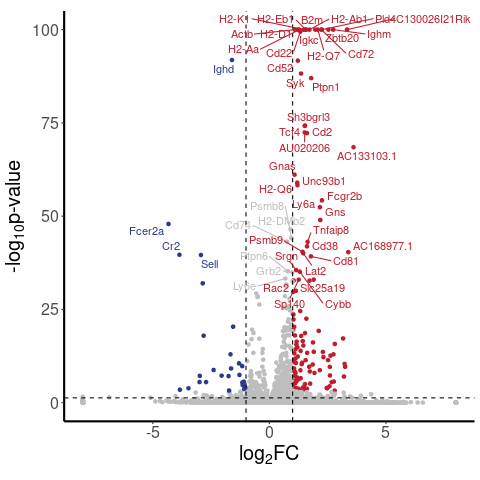

In [94]:
%%R
p1 <- ggplot(data=dge2, aes(x=logfoldchanges, y=-log10(pvals), col=expression, label = delabel)) + 
     geom_point() + geom_vline(xintercept = c(-1, 1), col = "#000000", linetype = "dashed") + 
     geom_hline(yintercept = -log10(0.05), col = "#000000", linetype = "dashed") +  
     scale_fill_manual(values = c("#2B3990", "gray", "#BE1E2D")) + 
     scale_color_manual(values = c("#2B3990", "gray", "#BE1E2D")) + 
     labs(x = expression("log"[2]*"FC"), y = expression("-log"[10]*"p-value")) + 
     geom_text_repel(max.overlaps = Inf) + 
     theme(text = element_text(size = 20, color = "#000000"), 
           legend.title = element_blank(),
           axis.line = element_line(colour = "#000000", size = 1), 
           legend.position = "none",
           panel.background = element_blank(),
           aspect.ratio = 1/1)
p1

In [95]:
%%R
sig_il_genes <- dge2 %>%
    filter(names %in% c("Tbx21", "Zbtb32","Zeb2", "Cd72","Cd22", "Pld4", "Fcgr2b", "H2-Ab1", "H2-Eb1","Sell", "Cr2", "Fcer2a", "Ighd", "H2-K1", "H2-Aa", "H2-Q7", "Cd38", "Cd81", "Cd2","Lgals1","Cd69"))

In [96]:
%%R
p <- ggplot(data=dge2, aes(x=logfoldchanges, y=-log10(pvals))) + 
    geom_point()  + 
    geom_point(aes(colour = expression)) +  
    geom_vline(xintercept = c(-1., 1), col = "#000000", linetype = "dashed") + 
    geom_hline(yintercept = -log10(0.05), col = "#000000", linetype = "dashed") + 
    #scale_fill_manual(values = c("black", "gray", "#EF6548"))  + 
    scale_color_manual(values = c("black", "gray", "#80CDC1")) + 
    geom_label_repel(data = sig_il_genes, aes(label = names),  max.overlaps = Inf, force = 2, force_pull=2, nudge_y = 2,) +
    labs(x = expression("log"[2]*"FC"), y = expression("-log"[10]*"p-value"))  +  theme(text = element_text(size = 18, color = "#000000"), 
         legend.title = element_blank(),
         axis.line = element_line(colour = "#000000", size = 0.5), 
         legend.position = "none",
         panel.background = element_blank(),
         aspect.ratio = 1/1)
p

In [97]:
%%R
ggsave(file = paste0("Volcano", "_ABC.pdf"), p, width = 5, height = 5)

### DGE analysis of Gzmk+ T  Bleo vs Control 

In [98]:
dge3= pd.read_csv("/home/gotej/Projects/Aging_BleoModel/Data/Dge_Gzmk_T_bleo_vs_control/diffxpy_control_vs_bleo_Gzmk+_T.txt", delimiter="\t")

#### Volcano plot

In [99]:
%R  -i dge3

In [100]:
dge3

gene          pval          qval    log2fc  pct.control  pct.bleo
0        Ccl5  4.440892e-16  1.291856e-12 -0.381047     0.987780  0.971522
1     S100a10  1.998401e-15  2.906675e-12 -0.556884     0.663951  0.469880
2      Malat1  3.774758e-15  3.660257e-12 -0.556791     0.887984  0.786418
3      Ms4a4b  1.265654e-14  9.204471e-12 -0.363670     0.879837  0.777656
4        Pim1  3.799627e-12  2.210623e-09 -0.993980     0.268839  0.106243
...       ...           ...           ...       ...          ...       ...
2904    Smad7  9.967699e-01  9.981424e-01 -0.000964     0.071283  0.053669
2905  Anapc13  9.972833e-01  9.983128e-01  0.001029     0.050916  0.035049
2906     Btg2  9.992610e-01  9.996047e-01 -0.000116     0.240326  0.201533
2907    Pebp1  9.989846e-01  9.996047e-01 -0.000340     0.050916  0.042716
2908    Sap18  9.998659e-01  9.998659e-01 -0.000046     0.050916  0.042716

[2909 rows x 6 columns]

In [101]:
%%R
dge3$expression <- "none"
dge3$expression[dge3$log2fc > 0.25 & dge3$qval < 0.05] <- "up"
dge3$expression[dge3$log2fc < -0.25 & dge3$qval < 0.05] <- "down"

In [102]:
%%R
dge3$delabel <- NA
dge3$delabel <- ifelse(dge3$gene %in% head(dge3[order(dge3$qval), "gene"], 50), dge3$gene, NA)

dge3.label1 <- dge3[abs(dge3$log2fc) >= 0.25 & dge3$qval < 0.05, ]
dge3.label1$delabel <- ifelse(dge3.label1$gene %in% head(dge3.label1[order(dge3.label1$qval), "gene"], 20), dge3.label1$gene, NA)
dge3.label2 <- dge3[!c(abs(dge3$log2fc) >= 0.25 & dge3$qval < 0.05), ]
dge3.label2$delabel <- NA
dge3.label <- rbind(dge3.label1, dge3.label2)

In [103]:
%%R
p1 <- ggplot(data=dge3, aes(x=log2fc, y=-log10(pval), col=expression, label = delabel)) + 
     geom_point() + geom_vline(xintercept = c(-0.25, 0.25), col = "#000000", linetype = "dashed") + 
     geom_hline(yintercept = -log10(0.05), col = "#000000", linetype = "dashed") +  
     scale_fill_manual(values = c("#2B3990", "gray", "#BE1E2D")) + 
     scale_color_manual(values = c("#2B3990", "gray", "#BE1E2D")) + 
     labs(x = expression("log"[2]*"FC"), y = expression("-log"[10]*"p-value")) + 
     geom_text_repel(max.overlaps = Inf) + 
     theme(text = element_text(size = 20, color = "#000000"), 
           legend.title = element_blank(),
           axis.line = element_line(colour = "#000000", size = 1), 
           legend.position = "none",
           panel.background = element_blank(),
           aspect.ratio = 1/1)
p1

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2859 rows containing missing values or values outside the scale range
(`geom_text_repel()`). 



In [104]:
%%R
sig_il_genes <- dge3 %>%
    filter(gene %in% c("Itgb1", "Cxcr3","Cxcr4", "Ltb","Prf1", "Gzmb", "Gzma", "Itgal", "Isg20", "Pim1", "Ccl5", "Ddx5","Gzmk"))

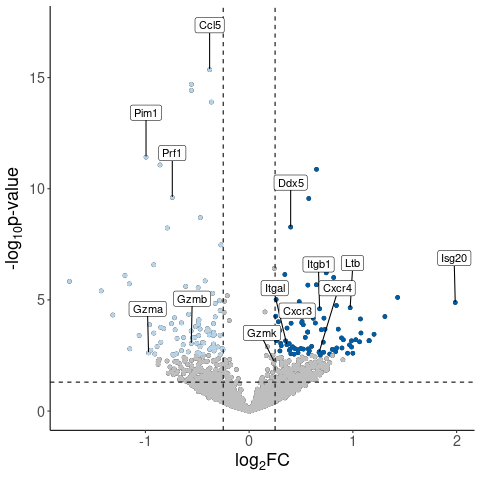

In [105]:
%%R
p <- ggplot(data=dge3, aes(x=log2fc, y=-log10(pval))) + 
    geom_point()  + 
    geom_point(aes(colour = expression)) +  
    geom_vline(xintercept = c(-0.25, 0.25), col = "#000000", linetype = "dashed") + 
    geom_hline(yintercept = -log10(0.05), col = "#000000", linetype = "dashed") + 
    #scale_fill_manual(values = c("black", "gray", "#EF6548"))  + 
    scale_color_manual(values = c("#B7D3E7", "gray", "#005DA4")) + 
    geom_label_repel(data = sig_il_genes, aes(label = gene),  max.overlaps = Inf, force = 2, force_pull=2, nudge_y = 2,) +
    labs(x = expression("log"[2]*"FC"), y = expression("-log"[10]*"p-value"))  +  theme(text = element_text(size = 18, color = "#000000"), 
         legend.title = element_blank(),
         axis.line = element_line(colour = "#000000", size = 0.5), 
         legend.position = "none",
         panel.background = element_blank(),
         aspect.ratio = 1/1)
p

In [106]:
%%R
ggsave(file = paste0("Volcano", "_Gzmk+_Bleo_vs_control.pdf"), p, width = 5, height = 5)

#### Gene Set Enrichment analysis

In [107]:
## upregulated genes
dge3_up = dge3.loc[(dge3.qval<0.05) & ((dge3.log2fc > 0.25))]
print("up:", dge3_up.shape)

## downregulated genes
dge3_down = dge3.loc[(dge3.qval<0.05) & ((dge3.log2fc < -0.25))]
print("down:", dge3_down.shape)

## convert to gene list
glist3_up =  dge3_up['gene'].squeeze().str.strip().tolist()
glist3_down =  dge3_down['gene'].squeeze().str.strip().tolist()

up: (82, 6)
down: (90, 6)


In [108]:
print(glist3_up)

['mt-Co1', 'mt-Cytb', 'Ddx5', 'Ly6e', 'BC005537', 'Rps26', 'Zfas1', 'Ptpn22', 'Dusp2', 'Rps27', 'Rnf213', 'Rplp0', 'Ctla2a', 'Isg20', '4932438A13Rik', 'Rps29', 'Ltb', 'Itgb1', 'Cd8a', 'Shisa5', 'Rcbtb2', 'Kcnn4', 'Sorl1', 'Srsf10', 'Junb', 'Gimap4', 'Cxcr3', 'Tcf7', 'Rsrp1', 'Uba52', 'Gimap3', 'Ip6k1', 'Aim2', 'Mxd4', 'Rpl31', 'Gadd45b', 'Clk1', 'Zbp1', 'Zfp36', 'Sema4a', 'Ddit4', 'Dnajb1', 'Skil', 'Ubb', 'Napa', 'Ncoa3', 'mt-Nd5', 'Rgs2', 'Adgrg5', 'Nufip2', 'Rps17', 'Coro1a', 'Itgal', 'Znrf1', 'mt-Nd4', 'Dazap1', 'mt-Nd2', 'Lemd2', 'Psmc6', 'Kif1b', 'Xist', 'Apobec3', 'Plgrkt', 'H2-Q4', 'AI504432', 'Gbp2', 'Stat1', 'Bptf', 'Sf1', 'mt-Nd1', 'Bag6', 'Ubash3a', 'Ivns1abp', 'Cxcr4', 'Numa1', 'Nucb1', 'Socs1', 'Lpxn', 'Gng2', 'Ssh2', 'Cyld', 'Vars']


In [109]:
print(glist3_down)

['Ccl5', 'S100a10', 'Malat1', 'Ms4a4b', 'Pim1', 'S100a4', 'Prf1', 'Spn', 'Gm2682', 'Tmsb4x', 'Klf3', 'Dtx1', 'Hsp90ab1', 'Pin4', 'Gm11346', 'Atp2b1', 'Arl4c', 'Borcs7', 'Calm1', 'Atp1b3', 'Rpl30', 'Cd2', 'Ms4a6b', 'Ubash3b', 'Txk', 'Add3', 'Rom1', 'Ncl', 'Igf2r', 'Dnajc9', 'Lpin1', 'Rasgrp2', 'Arap2', 'Wdr95', 'Tpr', 'Rasa3', 'Ngly1', 'Ripor2', 'Eea1', 'Sdcbp2', 'Crip1', 'Adam19', 'Serpinb6b', 'Fam107b', 'Tmc6', 'Epsti1', 'Lsp1', 'Ctdsp1', 'Myl6', 'Eef1d', 'Ppp1r12a', 'Pfdn1', 'Rpl24', 'Trbc1', 'Dnajc1', 'S1pr4', 'Klf2', 'Rbm28', 'Vamp8', 'Bod1l', 'Nsa2', 'Naa15', 'Gzmb', 'Abracl', 'Ak2', 'Pycard', 'Srpr', 'Cd247', 'Smc4', 'Maf', 'Tmsb10', 'Ttn', 'Cox5b', 'Tpm3', 'Eif3j1', 'Ndfip2', 'S100a6', 'Frg1', 'Zfp638', 'Gzma', 'Sept11', 'Hspd1', 'Apobec2', 'Nap1l1', 'Golgb1', 'Gm4759', 'Zmynd8', 'Iqgap2', 'Supt16', 'Vsir']


In [110]:
import gseapy
gene_set_names = gseapy.get_library_name(organism='Mouse')

In [111]:
enr_res3_up = gseapy.enrichr(gene_list=glist3_up,
                     organism='Mouse',
                     gene_sets=['GO_Biological_Process_2023', 'Reactome_2022', 'MSigDB_Hallmark_2020'],
                     cutoff = 0.05,
                     outdir="/home/gotej/Projects/Aging_BleoModel/Data/GZMK_bleo_vs_control_up")
enr_res3_up.results.head()

Gene_set  \
0  GO_Biological_Process_2023   
1  GO_Biological_Process_2023   
2  GO_Biological_Process_2023   
3  GO_Biological_Process_2023   
4  GO_Biological_Process_2023   

                                                Term Overlap       P-value  \
0               Cytoplasmic Translation (GO:0002181)    7/93  1.069971e-07   
1          Peptide Biosynthetic Process (GO:0043043)   6/158  4.716618e-05   
2                           Translation (GO:0006412)   7/234  4.950494e-05   
3    Macromolecule Biosynthetic Process (GO:0009059)   6/183  1.063876e-04   
4  Negative Regulation Of Antigen Receptor-Mediat...    3/24  1.263391e-04   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.000086            0                     0   21.523101   
1          0.013201            0                     0   10.266274   
2          0.013201            0                     0    8.096153   
3          0.020214            0                     0    8.805085   
4          0.020214            0                     0   35.980108   

   Combined Score                                      Genes  
0      345.455757  RPS26;RPS17;RPS27;RPS29;RPL31;RPLP0;UBA52  
1      102.270914        RPS26;RPS17;RPS27;RPS29;RPL31;RPLP0  
2       80.260709  RPS26;RPS17;RPS27;RPS29;RPL31;RPLP0;UBA52  
3       80.552624        RPS26;RPS17;RPS27;RPS29;RPL31;RPLP0  
4      322.976915                        LPXN;PTPN22;UBASH3A

In [112]:
enr_res3_down = gseapy.enrichr(gene_list=glist3_down,
                     organism='Mouse',
                     gene_sets=['GO_Biological_Process_2023', 'Reactome_2022', 'MSigDB_Hallmark_2020'],
                     cutoff = 0.05,
                     outdir="/home/gotej/Projects/Aging_BleoModel/Data/GZMK_bleo_vs_control_down")
enr_res3_down.results.head()

Gene_set  \
0  GO_Biological_Process_2023   
1  GO_Biological_Process_2023   
2  GO_Biological_Process_2023   
3  GO_Biological_Process_2023   
4  GO_Biological_Process_2023   

                                                Term Overlap   P-value  \
0        Regulation Of T Cell Migration (GO:2000404)    4/23  0.000003   
1  Regulation Of Type II Interferon Production (G...    5/87  0.000046   
2  Positive Regulation Of Lymphocyte Migration (G...    3/16  0.000047   
3  Positive Regulation Of Phosphoprotein Phosphat...    3/18  0.000068   
4  Positive Regulation Of Type II Interferon Prod...    4/58  0.000135   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.002916            0                     0   48.692778   
1          0.014457            0                     0   14.223816   
2          0.014457            0                     0   52.777188   
3          0.015697            0                     0   45.735632   
4          0.021623            0                     0   17.102498   

   Combined Score                      Genes  
0      616.388455     PYCARD;SPN;RIPOR2;CCL5  
1      142.183539  PYCARD;CD2;TXK;VSIR;HSPD1  
2      525.612434            PYCARD;SPN;CCL5  
3      438.564625    HSP90AB1;PPP1R12A;CALM1  
4      152.374271       PYCARD;CD2;TXK;HSPD1

In [113]:
GO_up3= pd.read_csv("/home/gotej/Projects/Aging_BleoModel/Data/GZMK_bleo_vs_control_up/GO_Biological_Process_2023.Mouse.enrichr.reports.txt", delimiter="\t")
GO_up3.head(5)

Gene_set  \
0  GO_Biological_Process_2023   
1  GO_Biological_Process_2023   
2  GO_Biological_Process_2023   
3  GO_Biological_Process_2023   
4  GO_Biological_Process_2023   

                                                Term Overlap       P-value  \
0               Cytoplasmic Translation (GO:0002181)    7/93  1.069971e-07   
1          Peptide Biosynthetic Process (GO:0043043)   6/158  4.716618e-05   
2                           Translation (GO:0006412)   7/234  4.950494e-05   
3    Macromolecule Biosynthetic Process (GO:0009059)   6/183  1.063876e-04   
4  Negative Regulation Of Antigen Receptor-Mediat...    3/24  1.263391e-04   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.000086            0                     0   21.523100   
1          0.013201            0                     0   10.266270   
2          0.013201            0                     0    8.096153   
3          0.020214            0                     0    8.805085   
4          0.020214            0                     0   35.980110   

   Combined Score                                      Genes  
0       345.45580  RPS26;RPS17;RPS27;RPS29;RPL31;RPLP0;UBA52  
1       102.27090        RPS26;RPS17;RPS27;RPS29;RPL31;RPLP0  
2        80.26071  RPS26;RPS17;RPS27;RPS29;RPL31;RPLP0;UBA52  
3        80.55262        RPS26;RPS17;RPS27;RPS29;RPL31;RPLP0  
4       322.97690                        LPXN;PTPN22;UBASH3A

In [114]:
Msig_up3= pd.read_csv("/home/gotej/Projects/Aging_BleoModel/Data/GZMK_bleo_vs_control_up/MSigDB_Hallmark_2020.Mouse.enrichr.reports.txt", delimiter="\t")
Msig_up3.head(5)

Gene_set                       Term Overlap   P-value  \
0  MSigDB_Hallmark_2020  Interferon Gamma Response   7/200  0.000018   
1  MSigDB_Hallmark_2020        Allograft Rejection   7/200  0.000018   
2  MSigDB_Hallmark_2020   IL-6/JAK/STAT3 Signaling    3/87  0.005497   
3  MSigDB_Hallmark_2020  Interferon Alpha Response    3/97  0.007426   
4  MSigDB_Hallmark_2020       IL-2/STAT5 Signaling   4/199  0.009096   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.000290            0                     0    9.538860   
1          0.000290            0                     0    9.538860   
2          0.037011            0                     0    8.966546   
3          0.037011            0                     0    8.008618   
4          0.037011            0                     0    5.186851   

   Combined Score                                     Genes  
0       104.13140  ZBP1;ISG20;SOCS1;RNF213;STAT1;NCOA3;LY6E  
1       104.13140     SOCS1;STAT1;CD8A;CXCR3;LTB;GBP2;ITGAL  
2        46.65793                           SOCS1;STAT1;LTB  
3        39.26436                           ISG20;GBP2;LY6E  
4        24.37800                   SOCS1;GADD45B;NCOA3;LTB

In [115]:
MSig_selection_up3 = Msig_up3.iloc[0:8]
GO_selection_up3 = GO_up3.iloc[[0,5,7,9,10]]
selection_up3 =  pd.concat([MSig_selection_up3, GO_selection_up3], axis=0)
selection_up3.shape

(13, 10)

In [116]:
selection_up3["-log10(p_adj)"] = selection_up3['Adjusted P-value'].apply(lambda x: -math.log10(x))
selection_up3.sort_values(by="-log10(p_adj)", ascending=False, inplace=True)

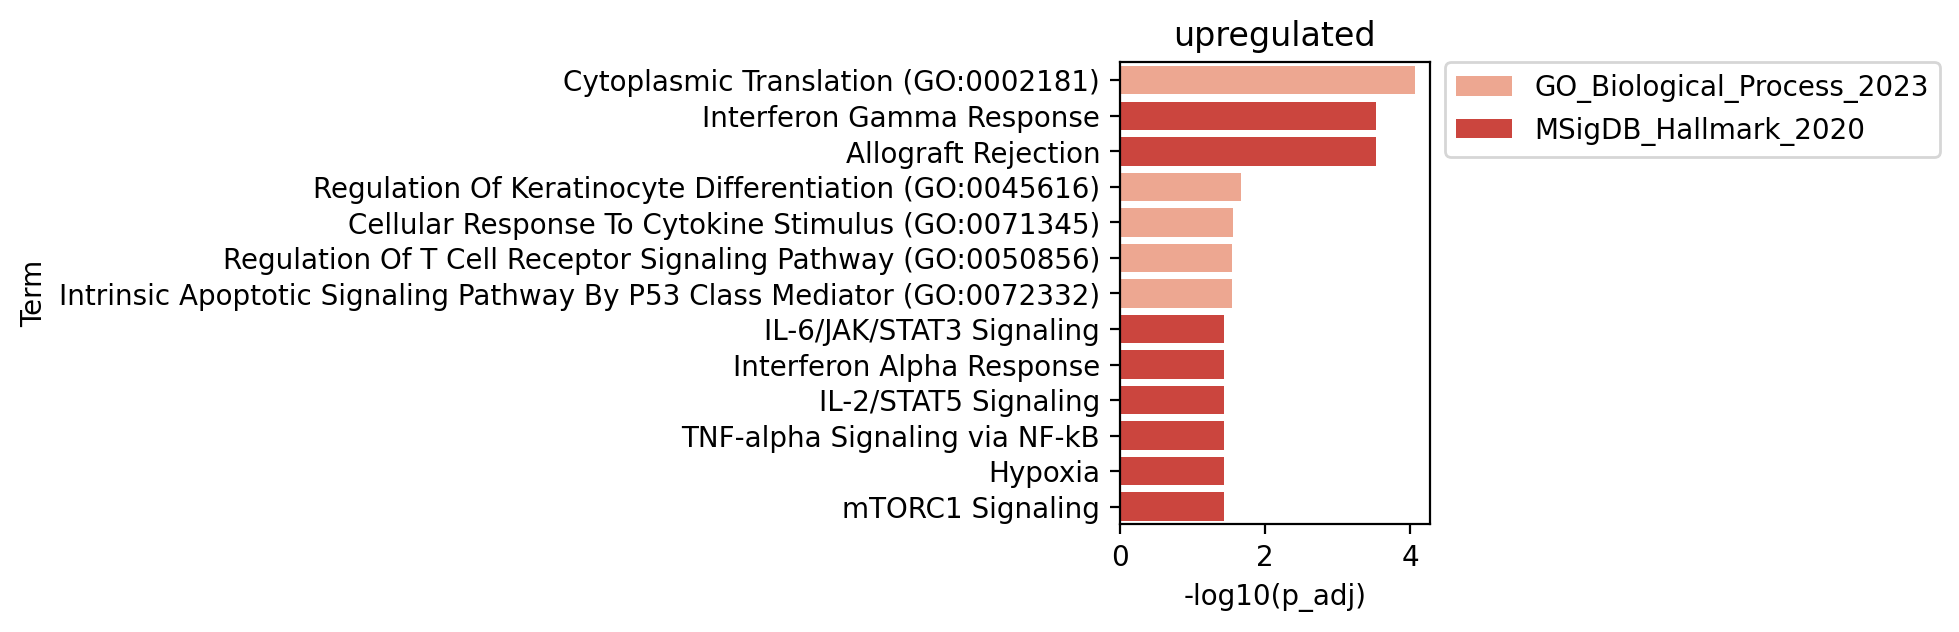

In [117]:
fig, ax = plt.subplots()
fig.set_size_inches(2,3)
sb.barplot(selection_up3, x="-log10(p_adj)", y="Term", orient="y", hue="Gene_set", palette="Reds", hue_order=["GO_Biological_Process_2023","MSigDB_Hallmark_2020"])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("upregulated", loc='center')
plt.savefig("/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/" +"_GzmkT_bleo_vs_control_enrichment_results_up.pdf")

In [118]:
Msig_down3= pd.read_csv("/home/gotej/Projects/Aging_BleoModel/Data/GZMK_bleo_vs_control_down/MSigDB_Hallmark_2020.Mouse.enrichr.reports.txt", delimiter="\t")
Msig_down3.head(5)

Gene_set                       Term Overlap   P-value  \
0  MSigDB_Hallmark_2020        Allograft Rejection   6/200  0.000288   
1  MSigDB_Hallmark_2020  Interferon Gamma Response   5/200  0.002102   
2  MSigDB_Hallmark_2020                 Complement   5/200  0.002102   
3  MSigDB_Hallmark_2020          Androgen Response   3/100  0.010407   
4  MSigDB_Hallmark_2020                  Apoptosis   3/161  0.036169   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.008915            0                     0    7.259205   
1          0.021721            0                     0    5.947210   
2          0.021721            0                     0    5.947210   
3          0.080656            0                     0    7.043370   
4          0.173413            0                     0    4.310781   

   Combined Score                          Genes  
0        59.19163  CD2;GZMA;CCL5;PRF1;GZMB;CD247  
1        36.66376    VAMP8;GZMA;CCL5;EPSTI1;PIM1  
2        36.66376      GZMA;CCL5;PIM1;GZMB;CALM1  
3        32.15480               MAF;NGLY1;IQGAP2  
4        14.30984                 CD2;PRF1;IGF2R

In [119]:
GO_down3= pd.read_csv("/home/gotej/Projects/Aging_BleoModel/Data/GZMK_bleo_vs_control_down/GO_Biological_Process_2023.Mouse.enrichr.reports.txt", delimiter="\t")
GO_down3.head(5)

Gene_set  \
0  GO_Biological_Process_2023   
1  GO_Biological_Process_2023   
2  GO_Biological_Process_2023   
3  GO_Biological_Process_2023   
4  GO_Biological_Process_2023   

                                                Term Overlap   P-value  \
0        Regulation Of T Cell Migration (GO:2000404)    4/23  0.000003   
1  Regulation Of Type II Interferon Production (G...    5/87  0.000046   
2  Positive Regulation Of Lymphocyte Migration (G...    3/16  0.000047   
3  Positive Regulation Of Phosphoprotein Phosphat...    3/18  0.000068   
4  Positive Regulation Of Type II Interferon Prod...    4/58  0.000135   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.002916            0                     0    48.69278   
1          0.014457            0                     0    14.22382   
2          0.014457            0                     0    52.77719   
3          0.015697            0                     0    45.73563   
4          0.021623            0                     0    17.10250   

   Combined Score                      Genes  
0        616.3885     PYCARD;SPN;RIPOR2;CCL5  
1        142.1835  PYCARD;CD2;TXK;VSIR;HSPD1  
2        525.6124            PYCARD;SPN;CCL5  
3        438.5646    HSP90AB1;PPP1R12A;CALM1  
4        152.3743       PYCARD;CD2;TXK;HSPD1

In [120]:
MSig_selection_down3 = Msig_down3.iloc[0:4]
GO_selection_down3 = GO_down3.iloc[[0,1,5,6,12]]
selection_down3 =  pd.concat([MSig_selection_down3, GO_selection_down3], axis=0)
selection_down3.shape

(9, 10)

In [121]:
selection_down3["-log10(p_adj)"] = selection_down3['Adjusted P-value'].apply(lambda x: -math.log10(x))
selection_down3.sort_values(by="-log10(p_adj)", ascending=False, inplace=True)

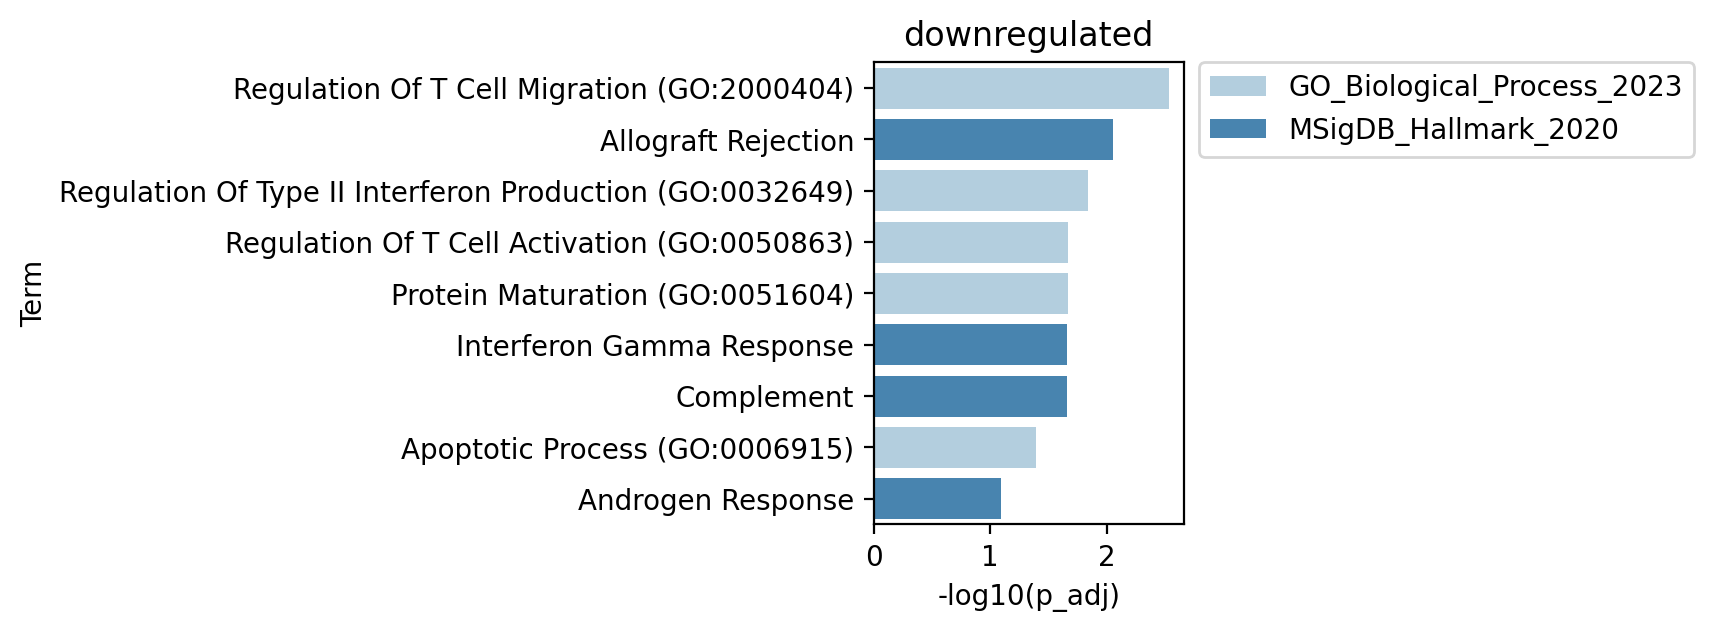

In [122]:
fig, ax = plt.subplots()
fig.set_size_inches(2,3)
sb.barplot(selection_down3, x="-log10(p_adj)", y="Term", orient="y", hue="Gene_set", palette="Blues", hue_order=["GO_Biological_Process_2023","MSigDB_Hallmark_2020"])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("downregulated", loc='center')
plt.savefig("/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/" +"_GzmkT_bleo_vs_control_enrichment_results_down.pdf")